# Library importation and Data loading

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from time import time

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

%matplotlib inline

In [2]:
def load_dataset(input_filepath, dataset_name=None, datetime_cols=None):
    '''Loads a *.txt file into a Pandas DataFrame'''
    
    t0 = time()
    df = pd.read_csv(input_filepath, sep=',', parse_dates=datetime_cols, infer_datetime_format=True)

    # Print status message
    print('Dataset Summary')
    print('----------------------------')
    print('Name:    {0:s}'.format(str(dataset_name)))
    print('Records: {0:d}'.format(df.shape[0]))
    print('Columns: {0:d}'.format(df.shape[1]))
    print('Size:    {0:3.2f}MB'.format(df.memory_usage(deep=True).sum() / 1000000))
    print('Time:    {0:3.2f}s'.format(time() - t0))
    print()
    
    return df

In [3]:
train = load_dataset('training_dataset.csv', dataset_name='train', datetime_cols=['observation_timestamp'])
test = load_dataset('test_dataset.csv', dataset_name='test', datetime_cols=['observation_timestamp'])

Dataset Summary
----------------------------
Name:    train
Records: 18512
Columns: 63
Size:    12.95MB
Time:    0.52s

Dataset Summary
----------------------------
Name:    test
Records: 5179
Columns: 61
Size:    3.54MB
Time:    0.18s



In [4]:
name = pd.read_csv('Juniper Networks Challenge - Data Dictionary - input_variables.csv')

In [5]:
name.head(2)

variable_name                             definition   units notes
0         observation_id  Unique identifier for the observation  (None)   NaN
1  observation_timestamp  Time of day of observation (UTC 24hr)  UTC 24   NaN

In [6]:
train.head(2)

Unnamed: 0                        observation_id observation_timestamp  \
0           0  704d2a80-d52e-11ec-90ff-c7e6292284b3   2022-05-16 15:39:57   
1           1  1cacc1d0-e6ac-11ec-b65d-156af70ce36b   2022-06-07 21:52:23   

   hour_of_day  register__sales_dollar_amt_this_hour  \
0           15                                347.29   
1           21                                361.59   

  register__payment_types_accepted  register__peak_sales_dollar_amt_per_hour  \
0                      Cash+Credit                                   -0.7383   
1                      Cash+Credit                                    0.6483   

   register__sales_dollar_amt_last_hour  register__sales_quantity_last_hour  \
0                               -0.1270                             -0.1993   
1                               -0.0362                             -0.0777   

   register__sales_quantity_rescanned_frac  ...  \
0                                  -0.8299  ...   
1                                  -0.7395  ...   

   region__sales_dollar_amt_last_hour  region__returns_dollar_amt_last_hour  \
0                             -0.6920                               -0.4605   
1                             -0.6531                               -0.4434   

   region__nighttime_open_registers  \
0                           -0.5180   
1                           -0.6498   

   region__nighttime_service_time_per_customer  \
0                                      -1.0062   
1                                       0.9031   

   region__nighttime_sales_amt_per_hour  \
0                               -0.6462   
1                               -0.6493   

   region__nighttime_returns_amt_per_hour  \
0                                 -0.6030   
1                                 -0.6106   

   region__peak_sales_dollar_amt_per_hour  \
0                                 -0.4773   
1                                  0.4998   

   region__peak_sales_dollar_amt_per_hour_v2  \
0                                     0.1748   
1                                    -0.9816   

   region__peak_returns_dollar_amt_per_hour  \
0                                   -1.7951   
1                                    0.8939   

   region__peak_returns_dollar_amt_per_hour_v2  
0                                      -0.8284  
1                                      -0.8614  

[2 rows x 63 columns]

In [7]:
test.head(2)

observation_id observation_timestamp  hour_of_day  \
0  3f483640-bc52-11ec-b736-8544dc068949   2022-04-15 00:23:00            0   
1  a88b0bb0-d2ae-11ec-bd0e-f5a7c7895456   2022-05-13 11:20:00           11   

  register__payment_types_accepted  register__peak_sales_dollar_amt_per_hour  \
0                      Cash+Credit                                    0.5693   
1                      Cash+Credit                                    0.3084   

   register__sales_dollar_amt_last_hour  register__sales_quantity_last_hour  \
0                               -0.1253                             -0.1489   
1                               -0.1270                             -0.1986   

   register__sales_quantity_rescanned_frac  \
0                                  -0.8176   
1                                   1.6562   

   register__sales_payments_declined_frac  \
0                                 -0.1066   
1                                 -0.1247   

   register__peak_returns_dollar_amt_per_hour  ...  \
0                                      0.9103  ...   
1                                     -0.5251  ...   

   region__sales_dollar_amt_last_hour  region__returns_dollar_amt_last_hour  \
0                             -0.6373                               -0.3791   
1                             -0.6483                               -0.4419   

   region__nighttime_open_registers  \
0                           -0.5581   
1                           -0.6498   

   region__nighttime_service_time_per_customer  \
0                                      -0.7148   
1                                       0.8867   

   region__nighttime_sales_amt_per_hour  \
0                               -0.6487   
1                               -0.6493   

   region__nighttime_returns_amt_per_hour  \
0                                 -0.6091   
1                                 -0.6106   

   region__peak_sales_dollar_amt_per_hour  \
0                                  1.0020   
1                                 -1.9779   

   region__peak_sales_dollar_amt_per_hour_v2  \
0                                    -0.5479   
1                                    -0.9816   

  region__peak_returns_dollar_amt_per_hour  \
0                                   0.8761   
1                                  -0.1311   

   region__peak_returns_dollar_amt_per_hour_v2  
0                                          NaN  
1                                      -0.8614  

[2 rows x 61 columns]

# EDA and Data cleaning and Preparation

In [8]:
test.shape, train.shape

((5179, 61), (18512, 63))

In [9]:
train.describe().T

count         mean  \
Unnamed: 0                                   18512.0  9255.500000   
hour_of_day                                  18512.0    12.316659   
register__sales_dollar_amt_this_hour         18512.0  1169.814248   
register__peak_sales_dollar_amt_per_hour     18512.0     0.002944   
register__sales_dollar_amt_last_hour         18512.0     0.000513   
register__sales_quantity_last_hour           18512.0     0.001174   
register__sales_quantity_rescanned_frac      18512.0    -0.014366   
register__sales_payments_declined_frac       18512.0     0.001537   
register__peak_returns_dollar_amt_per_hour   18512.0     0.006712   
register__returns_dollar_amt_last_hour       18512.0     0.003119   
register__returns_quantity_last_hour         18512.0     0.002602   
register__returns_quantity_rescanned_frac    18512.0    -0.024150   
cashier__title_level                         18512.0    -0.001829   
cashier__n_years_experience                  18512.0    -0.020377   
cashier__hours_into_shift                    18512.0     0.005945   
cashier__item_scan_rate_per_min              18512.0    -0.001230   
cashier__item_manual_entry_rate_per_min      18512.0    -0.001449   
store__miles_to_nearest_location             18512.0     0.030023   
store__target_sales_quantity_per_hour        18512.0    -0.022675   
store__mean_customer_to_staff_ratio          18512.0     0.000694   
store__mean_service_time_per_customer        18512.0     0.016124   
store__n_employees_total                     18512.0    -0.011804   
store__n_managers                            18512.0     0.002485   
store__n_baggers                             18512.0     0.008441   
store__n_open_registers                      18512.0     0.014078   
store__is_sufficiently_staffed               18512.0    -0.044088   
store__occupancy_main_floor                  18512.0     0.002835   
store__occupancy_grocery                     18512.0     0.005949   
store__occupancy_checkout_areas              18512.0    -0.026494   
store__occupancy_food_court                  18512.0    -0.000883   
store__occupancy_backrooms                   18512.0    -0.004780   
store__occupancy_indoors                     18512.0    -0.002356   
store__occupancy_outdoors                    18512.0    -0.021494   
store__outdoor_temperature                   18512.0    -0.030302   
store__parking_lot_utilization               18512.0    -0.023004   
store__shelf_freespace_frac                  18512.0    -0.030949   
store__hrs_since_last_delivery               18512.0    -0.010074   
store__sales_dollar_amt_last_hour            18512.0     0.002377   
store__sales_quantity_last_hour              18512.0     0.002736   
store__sales_quantity_rescanned_frac         18512.0     0.000494   
store__gift_sales_quantity_last_hour         18512.0    -0.027451   
store__returns_dollar_amt_last_hour          18512.0    -0.001778   
store__returns_quantity_last_hour            18512.0    -0.000283   
store__returns_quantity_rescanned_frac       18512.0     0.006926   
store__gift_returns_quantity_last_hour       18512.0    -0.004067   
region__n_stores                             18512.0     0.014392   
region__n_open_registers                     18512.0     0.017364   
region__mean_service_time_per_customer       18512.0     0.020981   
region__stdev_service_time_per_customer      18512.0     0.006291   
region__sales_dollar_amt_last_hour           18512.0     0.017787   
region__returns_dollar_amt_last_hour         18512.0     0.006959   
region__nighttime_open_registers             18512.0     0.014840   
region__nighttime_service_time_per_customer  18512.0     0.021682   
region__nighttime_sales_amt_per_hour         18512.0     0.018446   
region__nighttime_returns_amt_per_hour       18512.0     0.015523   
region__peak_sales_dollar_amt_per_hour       18512.0    -0.019027   
region__peak_sales_dollar_amt_per_hour_v2    18314.0     0.022354   
region__peak_returns_dollar_amt_per_hour     

In [10]:
test.describe().T

count       mean       std  \
hour_of_day                                  5179.0  12.448928  7.594229   
register__peak_sales_dollar_amt_per_hour     5179.0  -0.010514  0.972751   
register__sales_dollar_amt_last_hour         5179.0  -0.001834  0.308246   
register__sales_quantity_last_hour           5179.0  -0.004196  0.379155   
register__sales_quantity_rescanned_frac      5179.0   0.051338  1.038626   
register__sales_payments_declined_frac       5179.0  -0.005416  0.854413   
register__peak_returns_dollar_amt_per_hour   5179.0  -0.024011  0.961683   
register__returns_dollar_amt_last_hour       5179.0  -0.011157  0.440502   
register__returns_quantity_last_hour         5179.0  -0.009299  0.404110   
register__returns_quantity_rescanned_frac    5179.0   0.086297  1.125120   
cashier__title_level                         5179.0   0.006673  0.980332   
cashier__n_years_experience                  5179.0   0.072783  0.995660   
cashier__hours_into_shift                    5179.0  -0.021248  1.025167   
cashier__item_scan_rate_per_min              5179.0   0.004393  0.974398   
cashier__item_manual_entry_rate_per_min      5179.0   0.005180  0.967493   
store__miles_to_nearest_location             5179.0  -0.107405  1.069998   
store__target_sales_quantity_per_hour        5179.0   0.081059  1.249194   
store__mean_customer_to_staff_ratio          5179.0  -0.002490  0.965857   
store__mean_service_time_per_customer        5179.0  -0.057634  0.989132   
store__n_employees_total                     5179.0   0.042210  1.006755   
store__n_managers                            5179.0  -0.008966  0.983953   
store__n_baggers                             5179.0  -0.030090  0.965821   
store__n_open_registers                      5179.0  -0.050358  0.975150   
store__is_sufficiently_staffed               5179.0   0.157465  1.147490   
store__occupancy_main_floor                  5179.0  -0.010132  0.988904   
store__occupancy_grocery                     5179.0  -0.021263  1.008673   
store__occupancy_checkout_areas              5179.0   0.094690  1.103049   
store__occupancy_food_court                  5179.0   0.003157  1.017599   
store__occupancy_backrooms                   5179.0   0.017089  1.019796   
store__occupancy_indoors                     5179.0   0.008422  0.992185   
store__occupancy_outdoors                    5179.0   0.076829  1.060256   
store__outdoor_temperature                   5179.0   0.108313  1.040157   
store__parking_lot_utilization               5179.0   0.082224  1.006934   
store__shelf_freespace_frac                  5179.0   0.110619  1.047634   
store__hrs_since_last_delivery               5179.0   0.036008  1.012893   
store__sales_dollar_amt_last_hour            5179.0  -0.008499  0.958919   
store__sales_quantity_last_hour              5179.0  -0.009778  0.953383   
store__sales_quantity_rescanned_frac         5179.0  -0.001877  0.470289   
store__gift_sales_quantity_last_hour         5179.0   0.098162  1.078420   
store__returns_dollar_amt_last_hour          5179.0   0.006359  0.977558   
store__returns_quantity_last_hour            5179.0   0.001011  0.959065   
store__returns_quantity_rescanned_frac       5179.0  -0.024740  0.963265   
store__gift_returns_quantity_last_hour       5179.0   0.014547  1.095248   
region__n_stores                             5179.0  -0.051486  0.959925   
region__n_open_registers                     5179.0  -0.062057  0.968173   
region__mean_service_time_per_customer       5179.0  -0.074999  1.026359   
region__stdev_service_time_per_customer      5179.0  -0.022490  1.008570   
region__sales_dollar_amt_last_hour           5179.0  -0.063578  0.939940   
region__returns_dollar_amt_last_hour         5179.0  -0.024870  0.842878   
region__nighttime_open_registers             5179.0  -0.052953  0.977914   
region__nighttime_service_time_per_customer  5179.0  -0.077507  1.068716   
region__nighttime_sales_amt_per_hour         5179.0  -0.065948  0.971616   
region__nighttime_

In [11]:
name

variable_name  \
0                                observation_id   
1                         observation_timestamp   
2                                   hour_of_day   
3          register__sales_dollar_amt_this_hour   
4              register__payment_types_accepted   
..                                          ...   
57       region__nighttime_returns_amt_per_hour   
58       region__peak_sales_dollar_amt_per_hour   
59    region__peak_sales_dollar_amt_per_hour_v2   
60     region__peak_returns_dollar_amt_per_hour   
61  region__peak_returns_dollar_amt_per_hour_v2   

                                           definition     units  \
0               Unique identifier for the observation    (None)   
1               Time of day of observation (UTC 24hr)    UTC 24   
2                Hour of day extracted from timestamp    (None)   
3   (TARGET) Total sales in $ made at the register...      $/hr   
4              Payment types accepted at the register    (None)   
..                                                ...       ...   
57  Average total returns (in $) across all stores...  Standard   
58  Estimated peak hourly sales (in $) made across...  Standard   
59  Estimated peak hourly sales (in $) made across...  Standard   
60  Estimated peak hourly returns (in $) made acro...  Standard   
61  Estimated peak hourly returns (in $) made acro...  Standard   

                                                notes  
0                                                 NaN  
1                                                 NaN  
2                       Helps gauge daily seasonality  
3   It is normal to have wide variability even at ...  
4   Categorical variable; Options include check, c...  
..                                                ...  
57                                                NaN  
58                   Aggregated over previous quarter  
59  Aggregated over previous quarter; Improved est...  
60                   Aggregated over previous quarter  
61  Aggregated over previous quarter; Improved est...  

[62 rows x 4 columns]

In [12]:
train.isnull().sum()

Unnamed: 0                                        0
observation_id                                    0
observation_timestamp                             0
hour_of_day                                       0
register__sales_dollar_amt_this_hour              0
                                               ... 
region__nighttime_returns_amt_per_hour            0
region__peak_sales_dollar_amt_per_hour            0
region__peak_sales_dollar_amt_per_hour_v2       198
region__peak_returns_dollar_amt_per_hour          0
region__peak_returns_dollar_amt_per_hour_v2    1900
Length: 63, dtype: int64

In [13]:
test.isnull().sum()

observation_id                                   0
observation_timestamp                            0
hour_of_day                                      0
register__payment_types_accepted                 0
register__peak_sales_dollar_amt_per_hour         0
                                              ... 
region__nighttime_returns_amt_per_hour           0
region__peak_sales_dollar_amt_per_hour           0
region__peak_sales_dollar_amt_per_hour_v2      100
region__peak_returns_dollar_amt_per_hour         0
region__peak_returns_dollar_amt_per_hour_v2    568
Length: 61, dtype: int64

<AxesSubplot:>

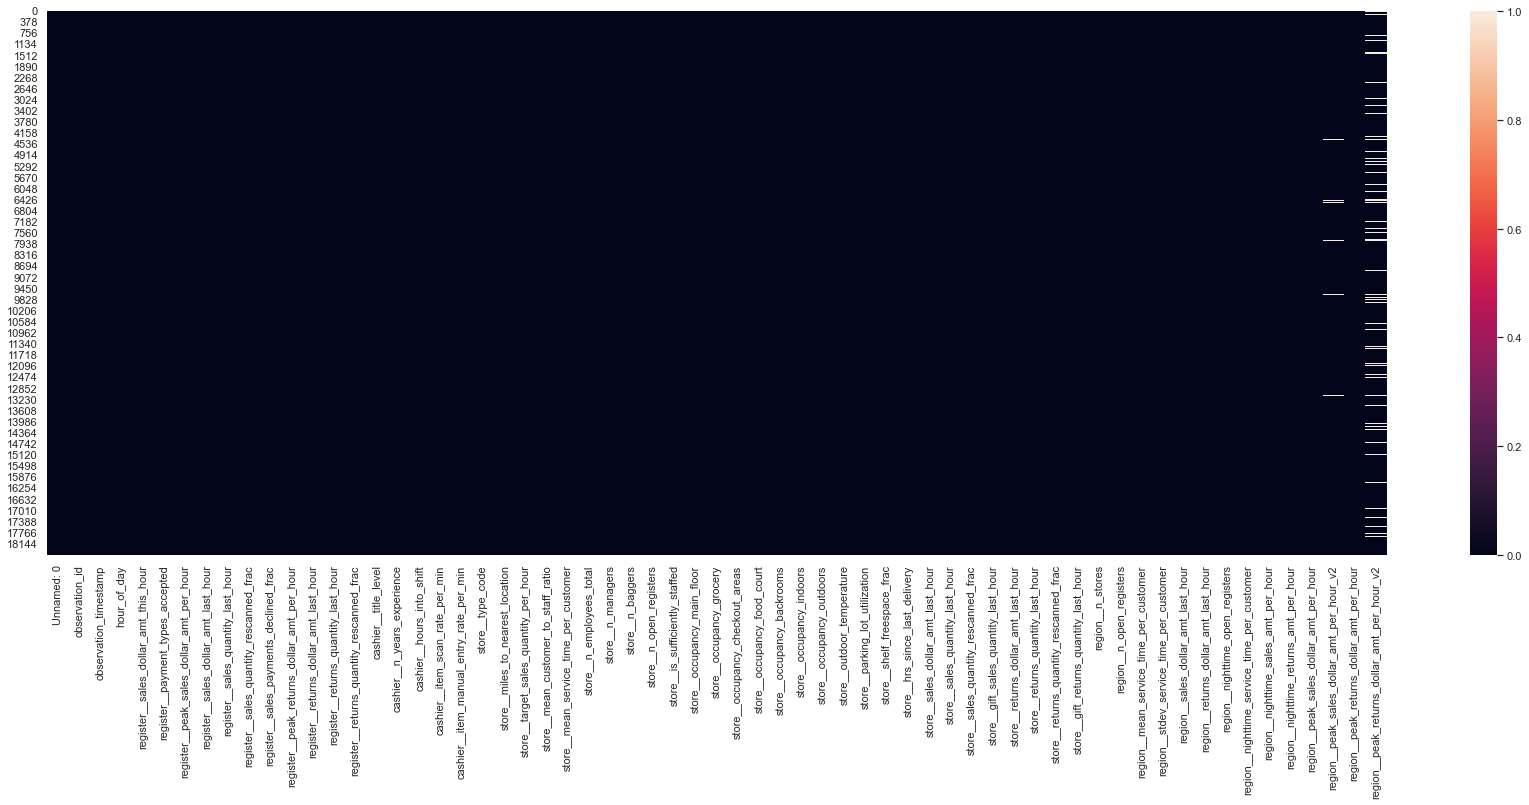

In [14]:
sns.set(rc={'figure.figsize':(30,10)})

sns.heatmap(train.isnull())

<AxesSubplot:>

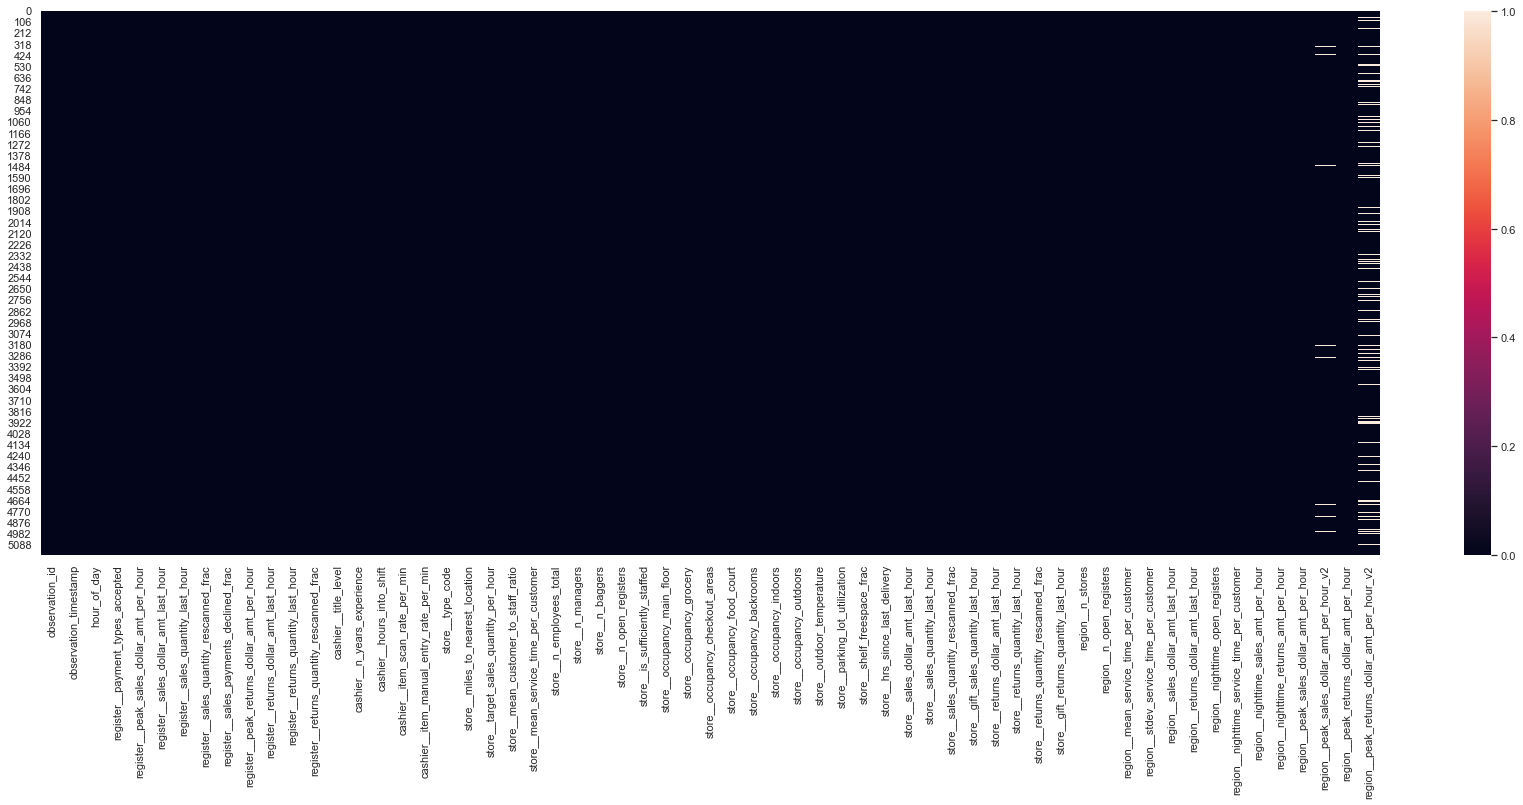

In [15]:
sns.heatmap(test.isnull())

In [16]:
train['region__peak_sales_dollar_amt_per_hour_v2'] = train['region__peak_sales_dollar_amt_per_hour_v2'].fillna(train['region__peak_sales_dollar_amt_per_hour_v2'].median())
train['region__peak_returns_dollar_amt_per_hour_v2'] = train['region__peak_returns_dollar_amt_per_hour_v2'].fillna(train['region__peak_returns_dollar_amt_per_hour_v2'].median())

In [17]:
train.isnull().sum()

Unnamed: 0                                     0
observation_id                                 0
observation_timestamp                          0
hour_of_day                                    0
register__sales_dollar_amt_this_hour           0
                                              ..
region__nighttime_returns_amt_per_hour         0
region__peak_sales_dollar_amt_per_hour         0
region__peak_sales_dollar_amt_per_hour_v2      0
region__peak_returns_dollar_amt_per_hour       0
region__peak_returns_dollar_amt_per_hour_v2    0
Length: 63, dtype: int64

<AxesSubplot:>

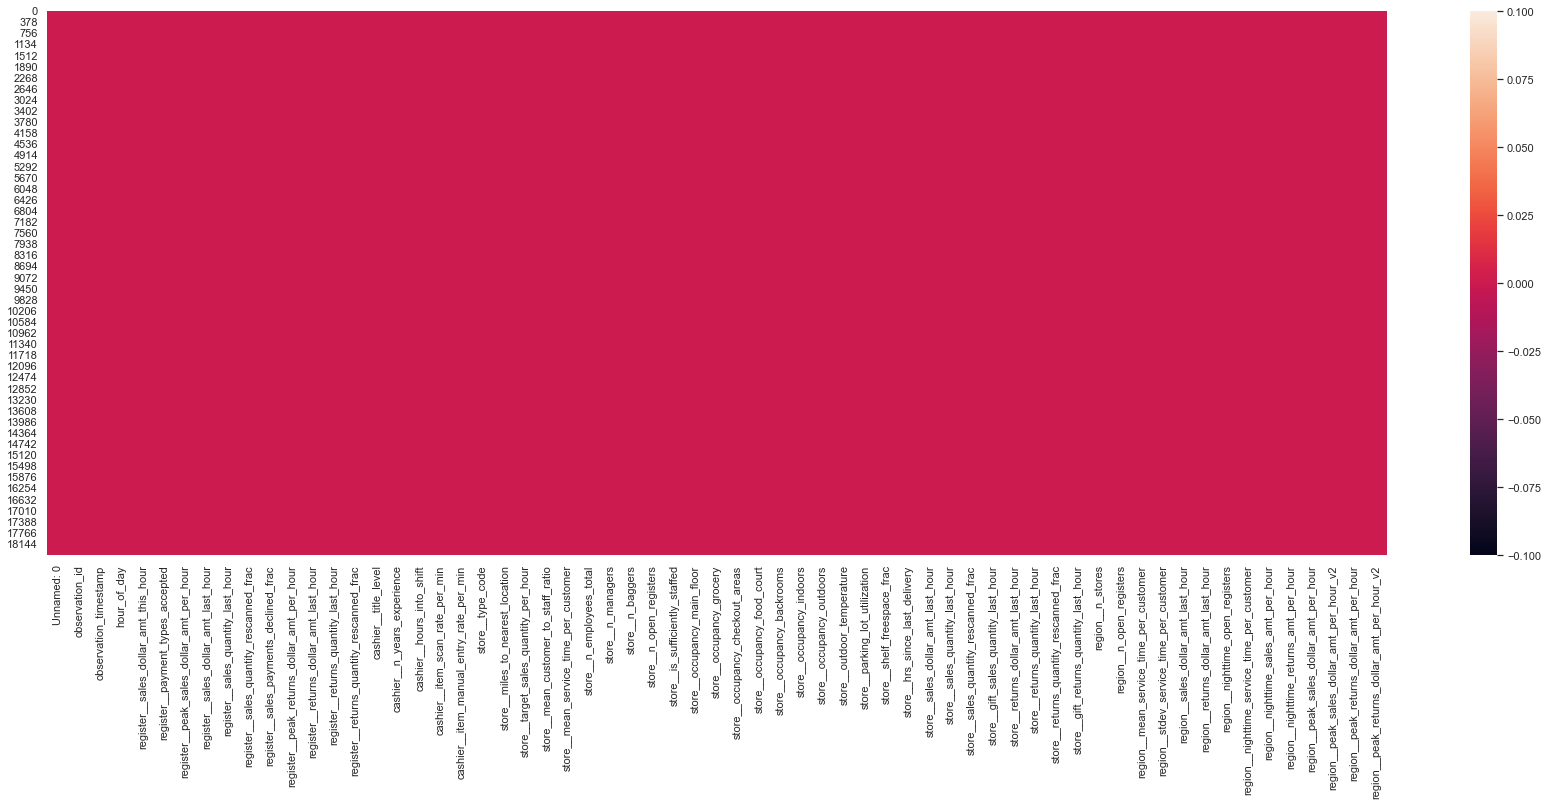

In [18]:
sns.heatmap(train.isnull())

In [19]:
# Dealing with missing value
test['region__peak_sales_dollar_amt_per_hour_v2'] = test['region__peak_sales_dollar_amt_per_hour_v2'].fillna(train['region__peak_sales_dollar_amt_per_hour_v2'].median())

test['region__peak_returns_dollar_amt_per_hour_v2'] = test['region__peak_returns_dollar_amt_per_hour_v2'].fillna(test['region__peak_returns_dollar_amt_per_hour_v2'].median())

<AxesSubplot:>

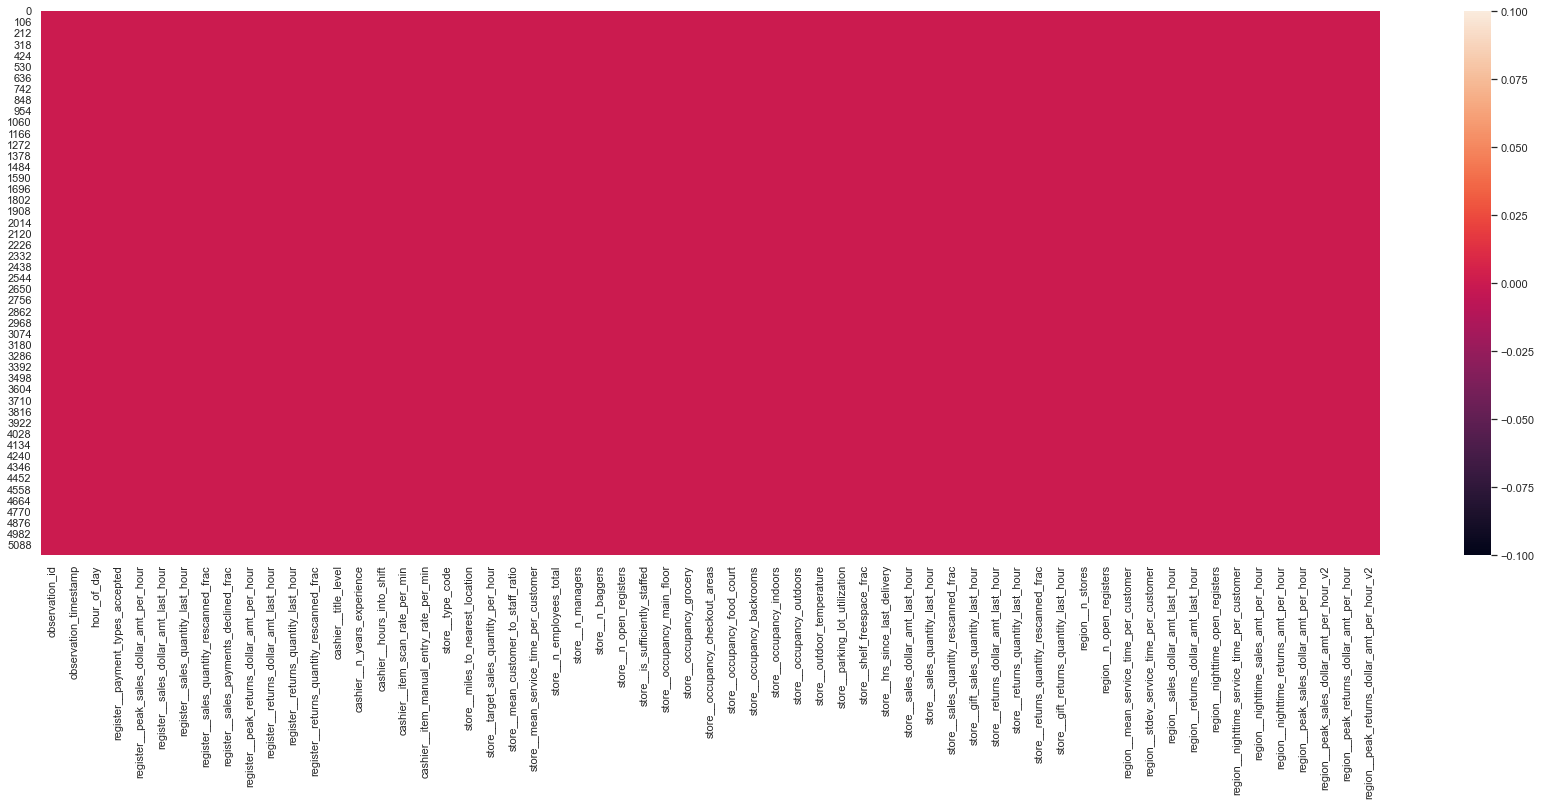

In [20]:
sns.heatmap(test.isnull())

In [21]:
train.columns

Index(['Unnamed: 0', 'observation_id', 'observation_timestamp', 'hour_of_day',
       'register__sales_dollar_amt_this_hour',
       'register__payment_types_accepted',
       'register__peak_sales_dollar_amt_per_hour',
       'register__sales_dollar_amt_last_hour',
       'register__sales_quantity_last_hour',
       'register__sales_quantity_rescanned_frac',
       'register__sales_payments_declined_frac',
       'register__peak_returns_dollar_amt_per_hour',
       'register__returns_dollar_amt_last_hour',
       'register__returns_quantity_last_hour',
       'register__returns_quantity_rescanned_frac', 'cashier__title_level',
       'cashier__n_years_experience', 'cashier__hours_into_shift',
       'cashier__item_scan_rate_per_min',
       'cashier__item_manual_entry_rate_per_min', 'store__type_code',
       'store__miles_to_nearest_location',
       'store__target_sales_quantity_per_hour',
       'store__mean_customer_to_staff_ratio',
       'store__mean_service_time_per_customer', 

In [22]:
train.drop(['Unnamed: 0', 'observation_id'], axis=1, inplace=True)
test.drop(['observation_id'], axis=1, inplace=True)

In [23]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18512 entries, 0 to 18511
Data columns (total 61 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   observation_timestamp                        18512 non-null  datetime64[ns]
 1   hour_of_day                                  18512 non-null  int64         
 2   register__sales_dollar_amt_this_hour         18512 non-null  float64       
 3   register__payment_types_accepted             18512 non-null  object        
 4   register__peak_sales_dollar_amt_per_hour     18512 non-null  float64       
 5   register__sales_dollar_amt_last_hour         18512 non-null  float64       
 6   register__sales_quantity_last_hour           18512 non-null  float64       
 7   register__sales_quantity_rescanned_frac      18512 non-null  float64       
 8   register__sales_payments_declined_frac       18512 non-null  float64       


In [24]:
train['store__type_code'].unique()

array(['A', 'D', 'B', 'C', 'F', 'E'], dtype=object)

In [25]:
test['store__type_code'].unique()

array(['C', 'A', 'B', 'D', 'F', 'E'], dtype=object)

In [26]:
train[['observation_timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18512 entries, 0 to 18511
Data columns (total 1 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   observation_timestamp  18512 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 144.8 KB


In [27]:
# Datetime formatting
train['observation_timestamp_day'] = pd.to_datetime(train['observation_timestamp']).dt.day

# month
train['observation_timestamp_month'] = pd.to_datetime(train['observation_timestamp']).dt.month
 
# year
train['observation_timestamp_year'] = pd.to_datetime(train['observation_timestamp']).dt.year

# hour
train['observation_timestamp_hour'] = pd.to_datetime(train['observation_timestamp']).dt.hour

train[['observation_timestamp', 'observation_timestamp_day', 'observation_timestamp_month', 
       'observation_timestamp_year', 'observation_timestamp_hour']].head()

observation_timestamp  observation_timestamp_day  \
0   2022-05-16 15:39:57                         16   
1   2022-06-07 21:52:23                          7   
2   2022-05-14 11:38:52                         14   
3   2022-07-26 10:02:41                         26   
4   2022-05-17 14:33:50                         17   

   observation_timestamp_month  observation_timestamp_year  \
0                            5                        2022   
1                            6                        2022   
2                            5                        2022   
3                            7                        2022   
4                            5                        2022   

   observation_timestamp_hour  
0                          15  
1                          21  
2                          11  
3                          10  
4                          14

In [28]:
test['observation_timestamp_day'] = pd.to_datetime(test['observation_timestamp']).dt.day

# month
test['observation_timestamp_month'] = pd.to_datetime(train['observation_timestamp']).dt.month
 
# year
test['observation_timestamp_year'] = pd.to_datetime(test['observation_timestamp']).dt.year

# hour
test['observation_timestamp_hour'] = pd.to_datetime(test['observation_timestamp']).dt.hour

test[['observation_timestamp', 'observation_timestamp_day', 'observation_timestamp_month', 
       'observation_timestamp_year', 'observation_timestamp_hour']].head()

observation_timestamp  observation_timestamp_day  \
0   2022-04-15 00:23:00                         15   
1   2022-05-13 11:20:00                         13   
2   2022-05-17 17:34:00                         17   
3   2022-06-03 00:18:00                          3   
4   2022-06-05 17:10:00                          5   

   observation_timestamp_month  observation_timestamp_year  \
0                            5                        2022   
1                            6                        2022   
2                            5                        2022   
3                            7                        2022   
4                            5                        2022   

   observation_timestamp_hour  
0                           0  
1                          11  
2                          17  
3                           0  
4                          17

In [29]:
train.shape, test.shape

((18512, 65), (5179, 64))

train['Dates'] = pd.to_datetime(train['observation_timestamp']).dt.date
train['Time'] = pd.to_datetime(train['observation_timestamp']).dt.time

In [30]:
train.drop(['observation_timestamp'], axis=1, inplace=True)
test.drop(['observation_timestamp'], axis=1, inplace=True)

# Feature selection and data evaluation

In [31]:
from sklearn.metrics import mean_squared_error, f1_score, confusion_matrix, classification_report, recall_score, precision_recall_fscore_support, precision_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train['store__type_code'] = le.fit_transform(train['store__type_code'])
test['store__type_code'] = le.fit_transform(test['store__type_code'])

In [32]:
train['register__payment_types_accepted'].unique()

array(['Cash+Credit', 'Credit', 'Cash+Credit+Check'], dtype=object)

In [33]:
train['register__payment_types_accepted']= le.fit_transform(train['register__payment_types_accepted'])
test['register__payment_types_accepted'] = le.fit_transform(test['register__payment_types_accepted'])

In [34]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5179 entries, 0 to 5178
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   hour_of_day                                  5179 non-null   int64  
 1   register__payment_types_accepted             5179 non-null   int32  
 2   register__peak_sales_dollar_amt_per_hour     5179 non-null   float64
 3   register__sales_dollar_amt_last_hour         5179 non-null   float64
 4   register__sales_quantity_last_hour           5179 non-null   float64
 5   register__sales_quantity_rescanned_frac      5179 non-null   float64
 6   register__sales_payments_declined_frac       5179 non-null   float64
 7   register__peak_returns_dollar_amt_per_hour   5179 non-null   float64
 8   register__returns_dollar_amt_last_hour       5179 non-null   float64
 9   register__returns_quantity_last_hour         5179 non-null   float64
 10  

In [35]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18512 entries, 0 to 18511
Data columns (total 64 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   hour_of_day                                  18512 non-null  int64  
 1   register__sales_dollar_amt_this_hour         18512 non-null  float64
 2   register__payment_types_accepted             18512 non-null  int32  
 3   register__peak_sales_dollar_amt_per_hour     18512 non-null  float64
 4   register__sales_dollar_amt_last_hour         18512 non-null  float64
 5   register__sales_quantity_last_hour           18512 non-null  float64
 6   register__sales_quantity_rescanned_frac      18512 non-null  float64
 7   register__sales_payments_declined_frac       18512 non-null  float64
 8   register__peak_returns_dollar_amt_per_hour   18512 non-null  float64
 9   register__returns_dollar_amt_last_hour       18512 non-null  float64
 10

In [36]:
X = train.drop(['register__sales_dollar_amt_this_hour'], axis=1)
y = train['register__sales_dollar_amt_this_hour']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

In [39]:
# random forest regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

print('MSE', mse(y_test, y_pred))
print("RMSE:", np.sqrt(mse(y_test, y_pred)))
print('R2:', r2(y_test, y_pred))

MSE 35681.85430234529
RMSE: 188.89641156555962
R2: 0.9470907655056432


<AxesSubplot:>

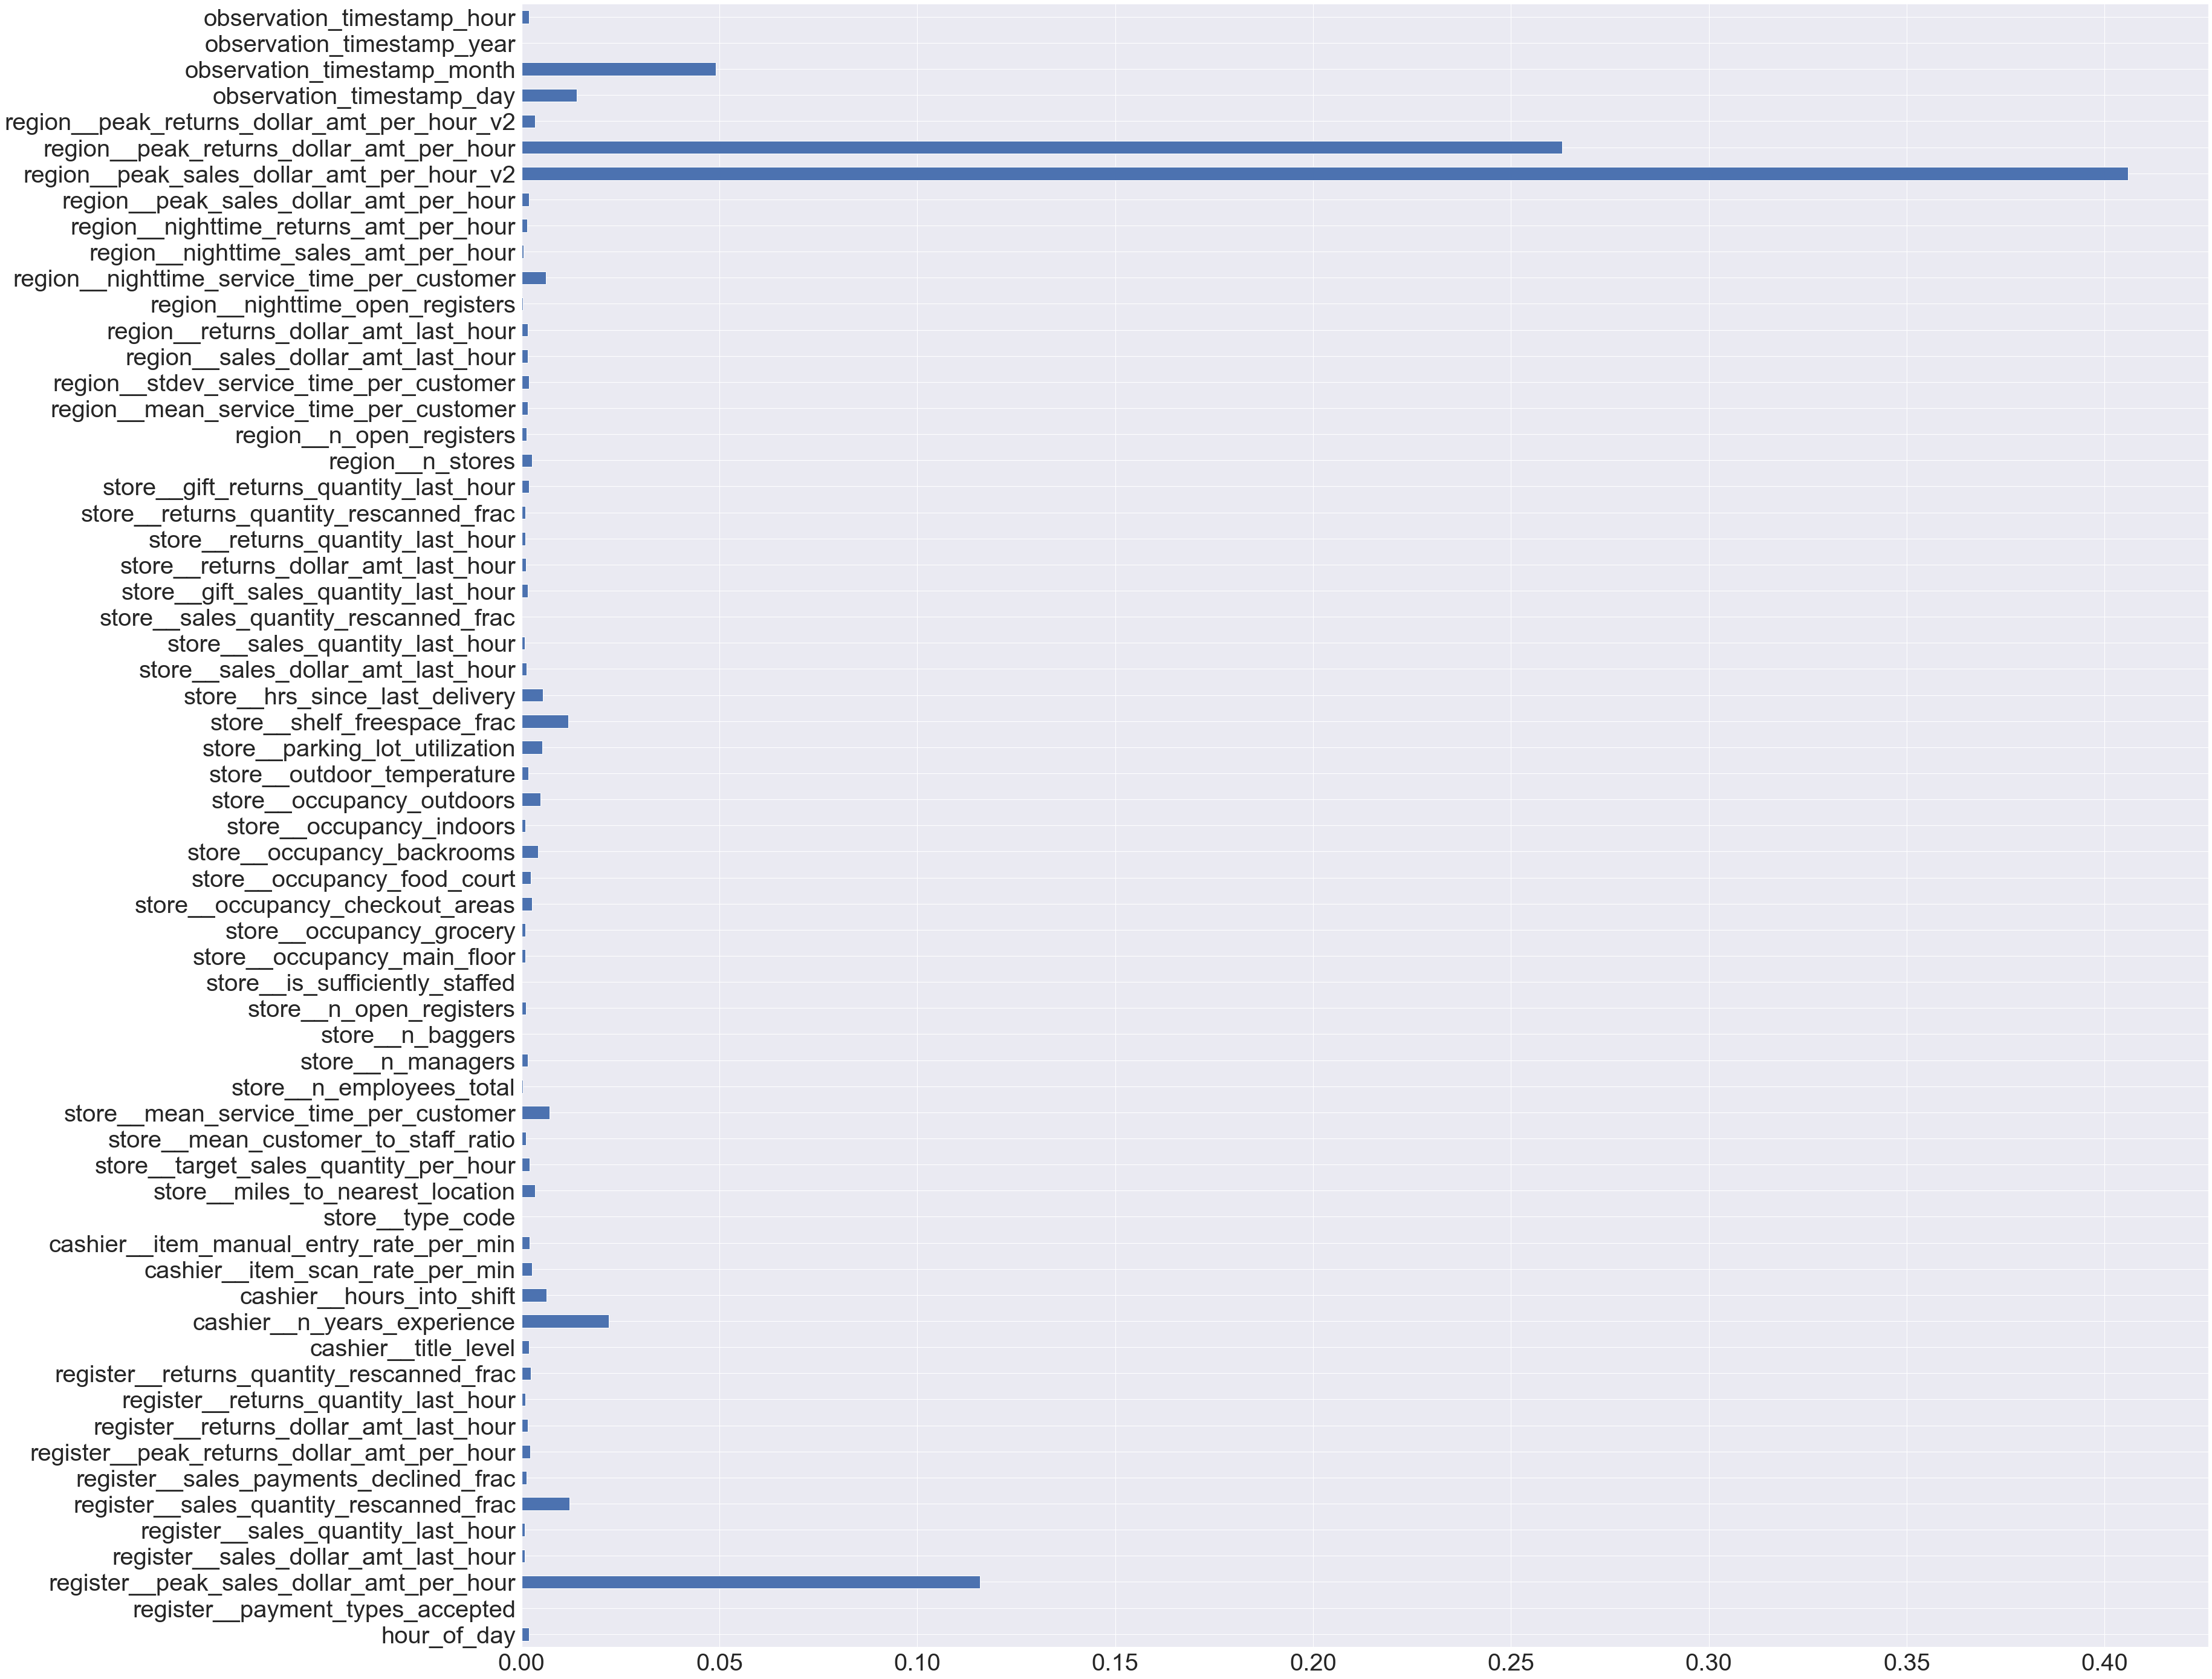

In [40]:
sns.set(rc={'figure.figsize':(50,50)})

pd.Series(rf_reg.feature_importances_, index= X_train.columns).plot(kind="barh", fontsize=40)

In [41]:
# GRADIENTBOOST
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

print('MSE:', mse(y_test, y_pred))
print("RMSE:", np.sqrt(mse(y_test, y_pred)))
print('R2:', r2(y_test, y_pred))

MSE: 42331.4856735846
RMSE: 205.74616806537273
R2: 0.9372306583895507


<AxesSubplot:>

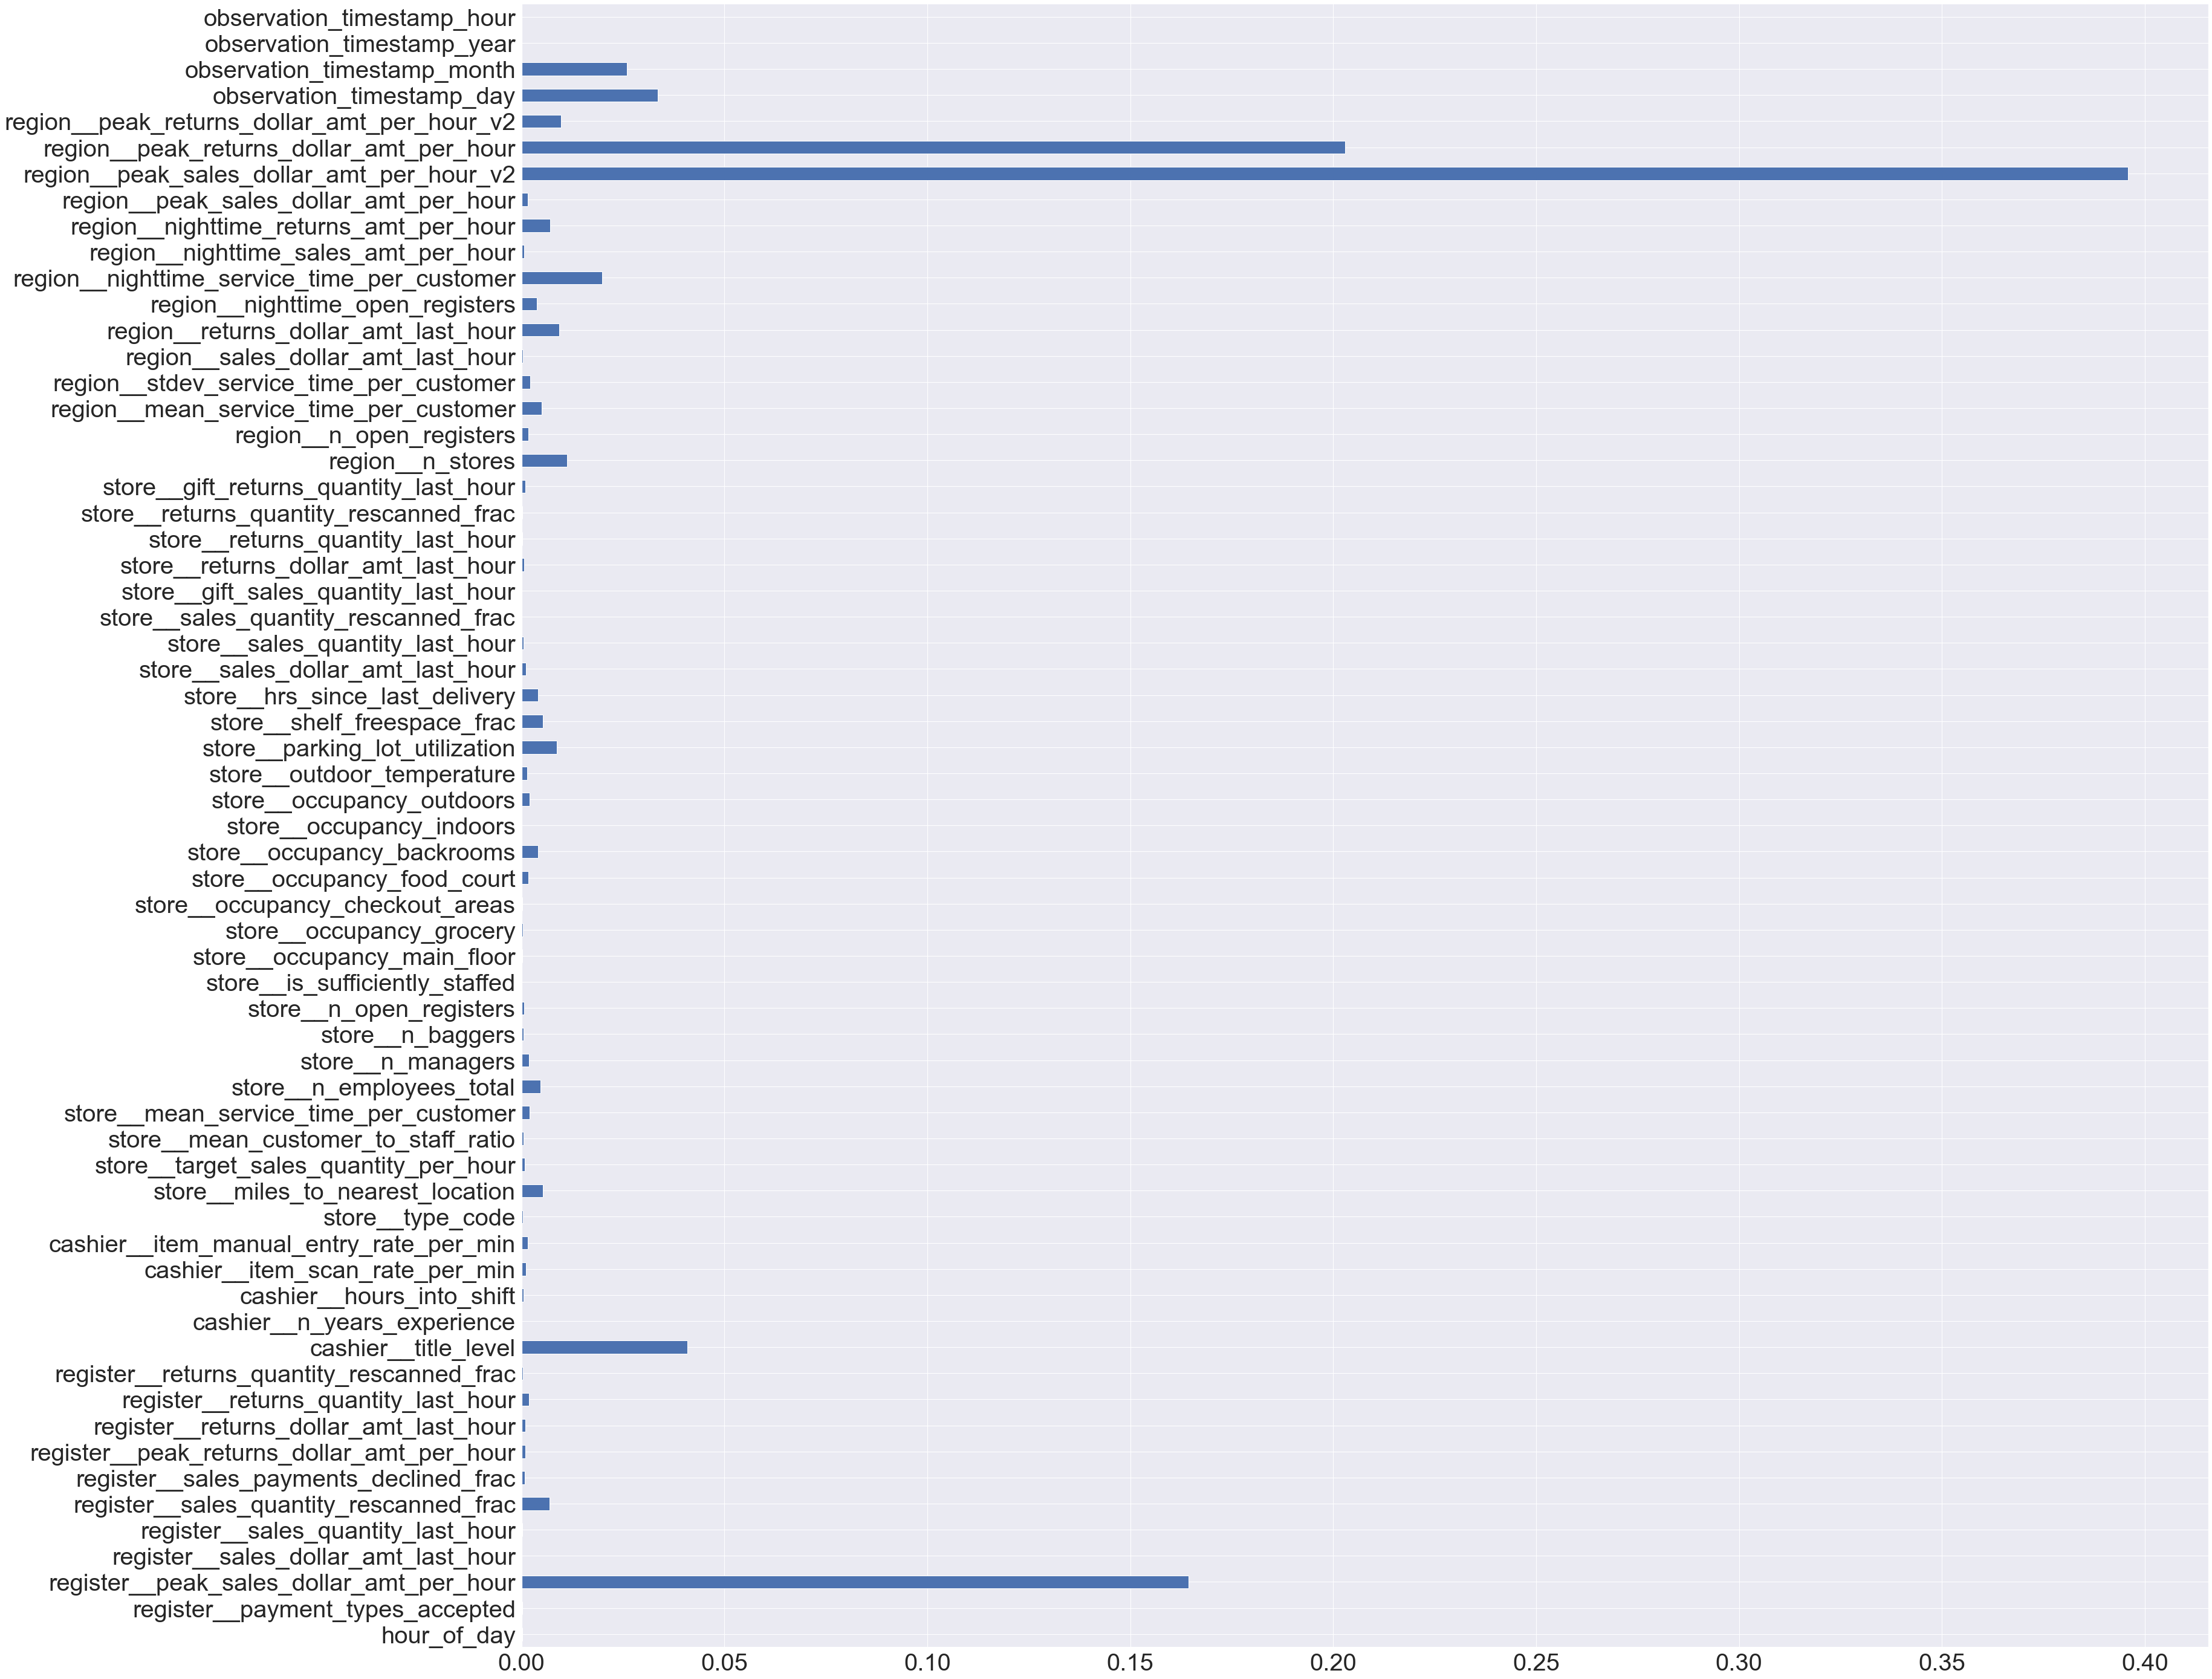

In [42]:
sns.set(rc={'figure.figsize':(50,50)})

pd.Series(gb.feature_importances_, index= X_train.columns).plot(kind="barh", fontsize=40)

In [43]:
catboost_model = CatBoostRegressor() #use catboost
lightgbm_model= LGBMRegressor() #use lightgbm

In [44]:
catboost_model.fit(X_train, y_train) 
y_pred = catboost_model.predict(X_test)

Learning rate set to 0.061371
0:	learn: 773.8744108	total: 187ms	remaining: 3m 6s
1:	learn: 734.5764439	total: 207ms	remaining: 1m 43s
2:	learn: 697.6455177	total: 225ms	remaining: 1m 14s
3:	learn: 662.9789705	total: 244ms	remaining: 1m
4:	learn: 629.9329626	total: 262ms	remaining: 52.1s
5:	learn: 599.3966165	total: 280ms	remaining: 46.4s
6:	learn: 571.2944775	total: 297ms	remaining: 42.2s
7:	learn: 544.8510645	total: 315ms	remaining: 39.1s
8:	learn: 520.6671570	total: 333ms	remaining: 36.6s
9:	learn: 497.3321560	total: 350ms	remaining: 34.7s
10:	learn: 475.8925795	total: 368ms	remaining: 33.1s
11:	learn: 456.4867693	total: 385ms	remaining: 31.7s
12:	learn: 437.6755899	total: 405ms	remaining: 30.8s
13:	learn: 420.1361125	total: 426ms	remaining: 30s
14:	learn: 404.2480744	total: 444ms	remaining: 29.2s
15:	learn: 389.8772681	total: 462ms	remaining: 28.4s
16:	learn: 376.7733119	total: 480ms	remaining: 27.7s
17:	learn: 364.4735412	total: 497ms	remaining: 27.1s
18:	learn: 352.6792387	total:

157:	learn: 180.7177881	total: 2.57s	remaining: 13.7s
158:	learn: 180.5376878	total: 2.58s	remaining: 13.7s
159:	learn: 180.2171712	total: 2.6s	remaining: 13.6s
160:	learn: 180.0545614	total: 2.61s	remaining: 13.6s
161:	learn: 179.8911383	total: 2.62s	remaining: 13.6s
162:	learn: 179.7894791	total: 2.64s	remaining: 13.5s
163:	learn: 179.6921241	total: 2.65s	remaining: 13.5s
164:	learn: 179.5569651	total: 2.66s	remaining: 13.5s
165:	learn: 179.4503898	total: 2.68s	remaining: 13.5s
166:	learn: 179.2670635	total: 2.69s	remaining: 13.4s
167:	learn: 179.1170560	total: 2.71s	remaining: 13.4s
168:	learn: 178.9943071	total: 2.72s	remaining: 13.4s
169:	learn: 178.8923502	total: 2.73s	remaining: 13.3s
170:	learn: 178.7990353	total: 2.75s	remaining: 13.3s
171:	learn: 178.7431038	total: 2.76s	remaining: 13.3s
172:	learn: 178.6908854	total: 2.78s	remaining: 13.3s
173:	learn: 178.5810100	total: 2.79s	remaining: 13.3s
174:	learn: 178.4778163	total: 2.81s	remaining: 13.2s
175:	learn: 178.2966807	total

318:	learn: 160.3839577	total: 4.68s	remaining: 10s
319:	learn: 160.2684564	total: 4.7s	remaining: 9.98s
320:	learn: 160.1666162	total: 4.71s	remaining: 9.97s
321:	learn: 160.0249788	total: 4.73s	remaining: 9.95s
322:	learn: 159.8950377	total: 4.74s	remaining: 9.94s
323:	learn: 159.8872781	total: 4.75s	remaining: 9.91s
324:	learn: 159.7971061	total: 4.76s	remaining: 9.9s
325:	learn: 159.6254970	total: 4.78s	remaining: 9.88s
326:	learn: 159.4897092	total: 4.79s	remaining: 9.86s
327:	learn: 159.3772435	total: 4.8s	remaining: 9.84s
328:	learn: 159.2556608	total: 4.82s	remaining: 9.82s
329:	learn: 159.2025909	total: 4.83s	remaining: 9.8s
330:	learn: 159.1208179	total: 4.84s	remaining: 9.78s
331:	learn: 159.0799056	total: 4.85s	remaining: 9.76s
332:	learn: 158.9728300	total: 4.86s	remaining: 9.74s
333:	learn: 158.8351893	total: 4.88s	remaining: 9.73s
334:	learn: 158.6885425	total: 4.89s	remaining: 9.71s
335:	learn: 158.6020530	total: 4.9s	remaining: 9.69s
336:	learn: 158.4793616	total: 4.92

474:	learn: 147.2548071	total: 6.62s	remaining: 7.32s
475:	learn: 147.1695197	total: 6.63s	remaining: 7.3s
476:	learn: 147.1176241	total: 6.65s	remaining: 7.29s
477:	learn: 147.0182921	total: 6.66s	remaining: 7.27s
478:	learn: 146.9646237	total: 6.67s	remaining: 7.26s
479:	learn: 146.8411740	total: 6.69s	remaining: 7.24s
480:	learn: 146.7389649	total: 6.7s	remaining: 7.23s
481:	learn: 146.6031611	total: 6.71s	remaining: 7.21s
482:	learn: 146.5001728	total: 6.72s	remaining: 7.2s
483:	learn: 146.4470912	total: 6.73s	remaining: 7.18s
484:	learn: 146.3736115	total: 6.74s	remaining: 7.16s
485:	learn: 146.3191782	total: 6.75s	remaining: 7.14s
486:	learn: 146.2891640	total: 6.75s	remaining: 7.12s
487:	learn: 146.2598032	total: 6.76s	remaining: 7.09s
488:	learn: 146.1809652	total: 6.77s	remaining: 7.07s
489:	learn: 146.0617803	total: 6.8s	remaining: 7.08s
490:	learn: 145.9700529	total: 6.86s	remaining: 7.11s
491:	learn: 145.9667546	total: 6.91s	remaining: 7.13s
492:	learn: 145.8949253	total: 6

632:	learn: 136.1613585	total: 11.4s	remaining: 6.61s
633:	learn: 136.0846559	total: 11.4s	remaining: 6.6s
634:	learn: 136.0113145	total: 11.4s	remaining: 6.58s
635:	learn: 135.9718008	total: 11.5s	remaining: 6.57s
636:	learn: 135.9172503	total: 11.5s	remaining: 6.55s
637:	learn: 135.8696191	total: 11.5s	remaining: 6.54s
638:	learn: 135.8221440	total: 11.5s	remaining: 6.52s
639:	learn: 135.7811769	total: 11.6s	remaining: 6.51s
640:	learn: 135.7003096	total: 11.6s	remaining: 6.5s
641:	learn: 135.6370146	total: 11.6s	remaining: 6.48s
642:	learn: 135.6342807	total: 11.6s	remaining: 6.47s
643:	learn: 135.6018309	total: 11.7s	remaining: 6.45s
644:	learn: 135.5179155	total: 11.7s	remaining: 6.44s
645:	learn: 135.4419808	total: 11.7s	remaining: 6.42s
646:	learn: 135.3861000	total: 11.7s	remaining: 6.41s
647:	learn: 135.3651339	total: 11.8s	remaining: 6.4s
648:	learn: 135.3211548	total: 11.8s	remaining: 6.38s
649:	learn: 135.2258446	total: 11.8s	remaining: 6.37s
650:	learn: 135.0867245	total: 

790:	learn: 127.1233236	total: 15.4s	remaining: 4.07s
791:	learn: 127.0541045	total: 15.4s	remaining: 4.05s
792:	learn: 127.0151787	total: 15.4s	remaining: 4.03s
793:	learn: 126.9795883	total: 15.5s	remaining: 4.01s
794:	learn: 126.9038892	total: 15.5s	remaining: 3.99s
795:	learn: 126.8610129	total: 15.5s	remaining: 3.97s
796:	learn: 126.8054534	total: 15.5s	remaining: 3.95s
797:	learn: 126.7274755	total: 15.5s	remaining: 3.94s
798:	learn: 126.6735297	total: 15.6s	remaining: 3.92s
799:	learn: 126.6433014	total: 15.6s	remaining: 3.9s
800:	learn: 126.6175375	total: 15.6s	remaining: 3.88s
801:	learn: 126.5836254	total: 15.6s	remaining: 3.86s
802:	learn: 126.5116735	total: 15.7s	remaining: 3.84s
803:	learn: 126.4549844	total: 15.7s	remaining: 3.82s
804:	learn: 126.4001534	total: 15.7s	remaining: 3.8s
805:	learn: 126.3567388	total: 15.7s	remaining: 3.78s
806:	learn: 126.3179791	total: 15.7s	remaining: 3.77s
807:	learn: 126.2780024	total: 15.8s	remaining: 3.75s
808:	learn: 126.2502316	total:

948:	learn: 119.7701258	total: 18.6s	remaining: 1s
949:	learn: 119.6851720	total: 18.6s	remaining: 981ms
950:	learn: 119.6426395	total: 18.7s	remaining: 962ms
951:	learn: 119.5853396	total: 18.7s	remaining: 942ms
952:	learn: 119.5558723	total: 18.7s	remaining: 922ms
953:	learn: 119.4932336	total: 18.7s	remaining: 903ms
954:	learn: 119.4428595	total: 18.7s	remaining: 883ms
955:	learn: 119.4054527	total: 18.8s	remaining: 863ms
956:	learn: 119.3711350	total: 18.8s	remaining: 844ms
957:	learn: 119.3310100	total: 18.8s	remaining: 824ms
958:	learn: 119.3230837	total: 18.8s	remaining: 804ms
959:	learn: 119.2976158	total: 18.8s	remaining: 784ms
960:	learn: 119.2668344	total: 18.8s	remaining: 765ms
961:	learn: 119.2242935	total: 18.9s	remaining: 745ms
962:	learn: 119.1935768	total: 18.9s	remaining: 725ms
963:	learn: 119.1453627	total: 18.9s	remaining: 706ms
964:	learn: 119.1053441	total: 18.9s	remaining: 686ms
965:	learn: 119.0616724	total: 18.9s	remaining: 666ms
966:	learn: 119.0088823	total: 

In [45]:
print('MSE:', mse(y_test, y_pred))
print("RMSE:", np.sqrt(mse(y_test, y_pred)))
print('R2:', r2(y_test, y_pred))

MSE: 34218.52671372811
RMSE: 184.98250380435474
R2: 0.9492605950742573


In [46]:
test.shape

(5179, 63)

In [47]:
predictions = catboost_model.predict(test)

In [48]:
results_df = pd.DataFrame({'prediction':predictions})

In [49]:
results_df.to_csv('p1.csv',index=False)

<AxesSubplot:>

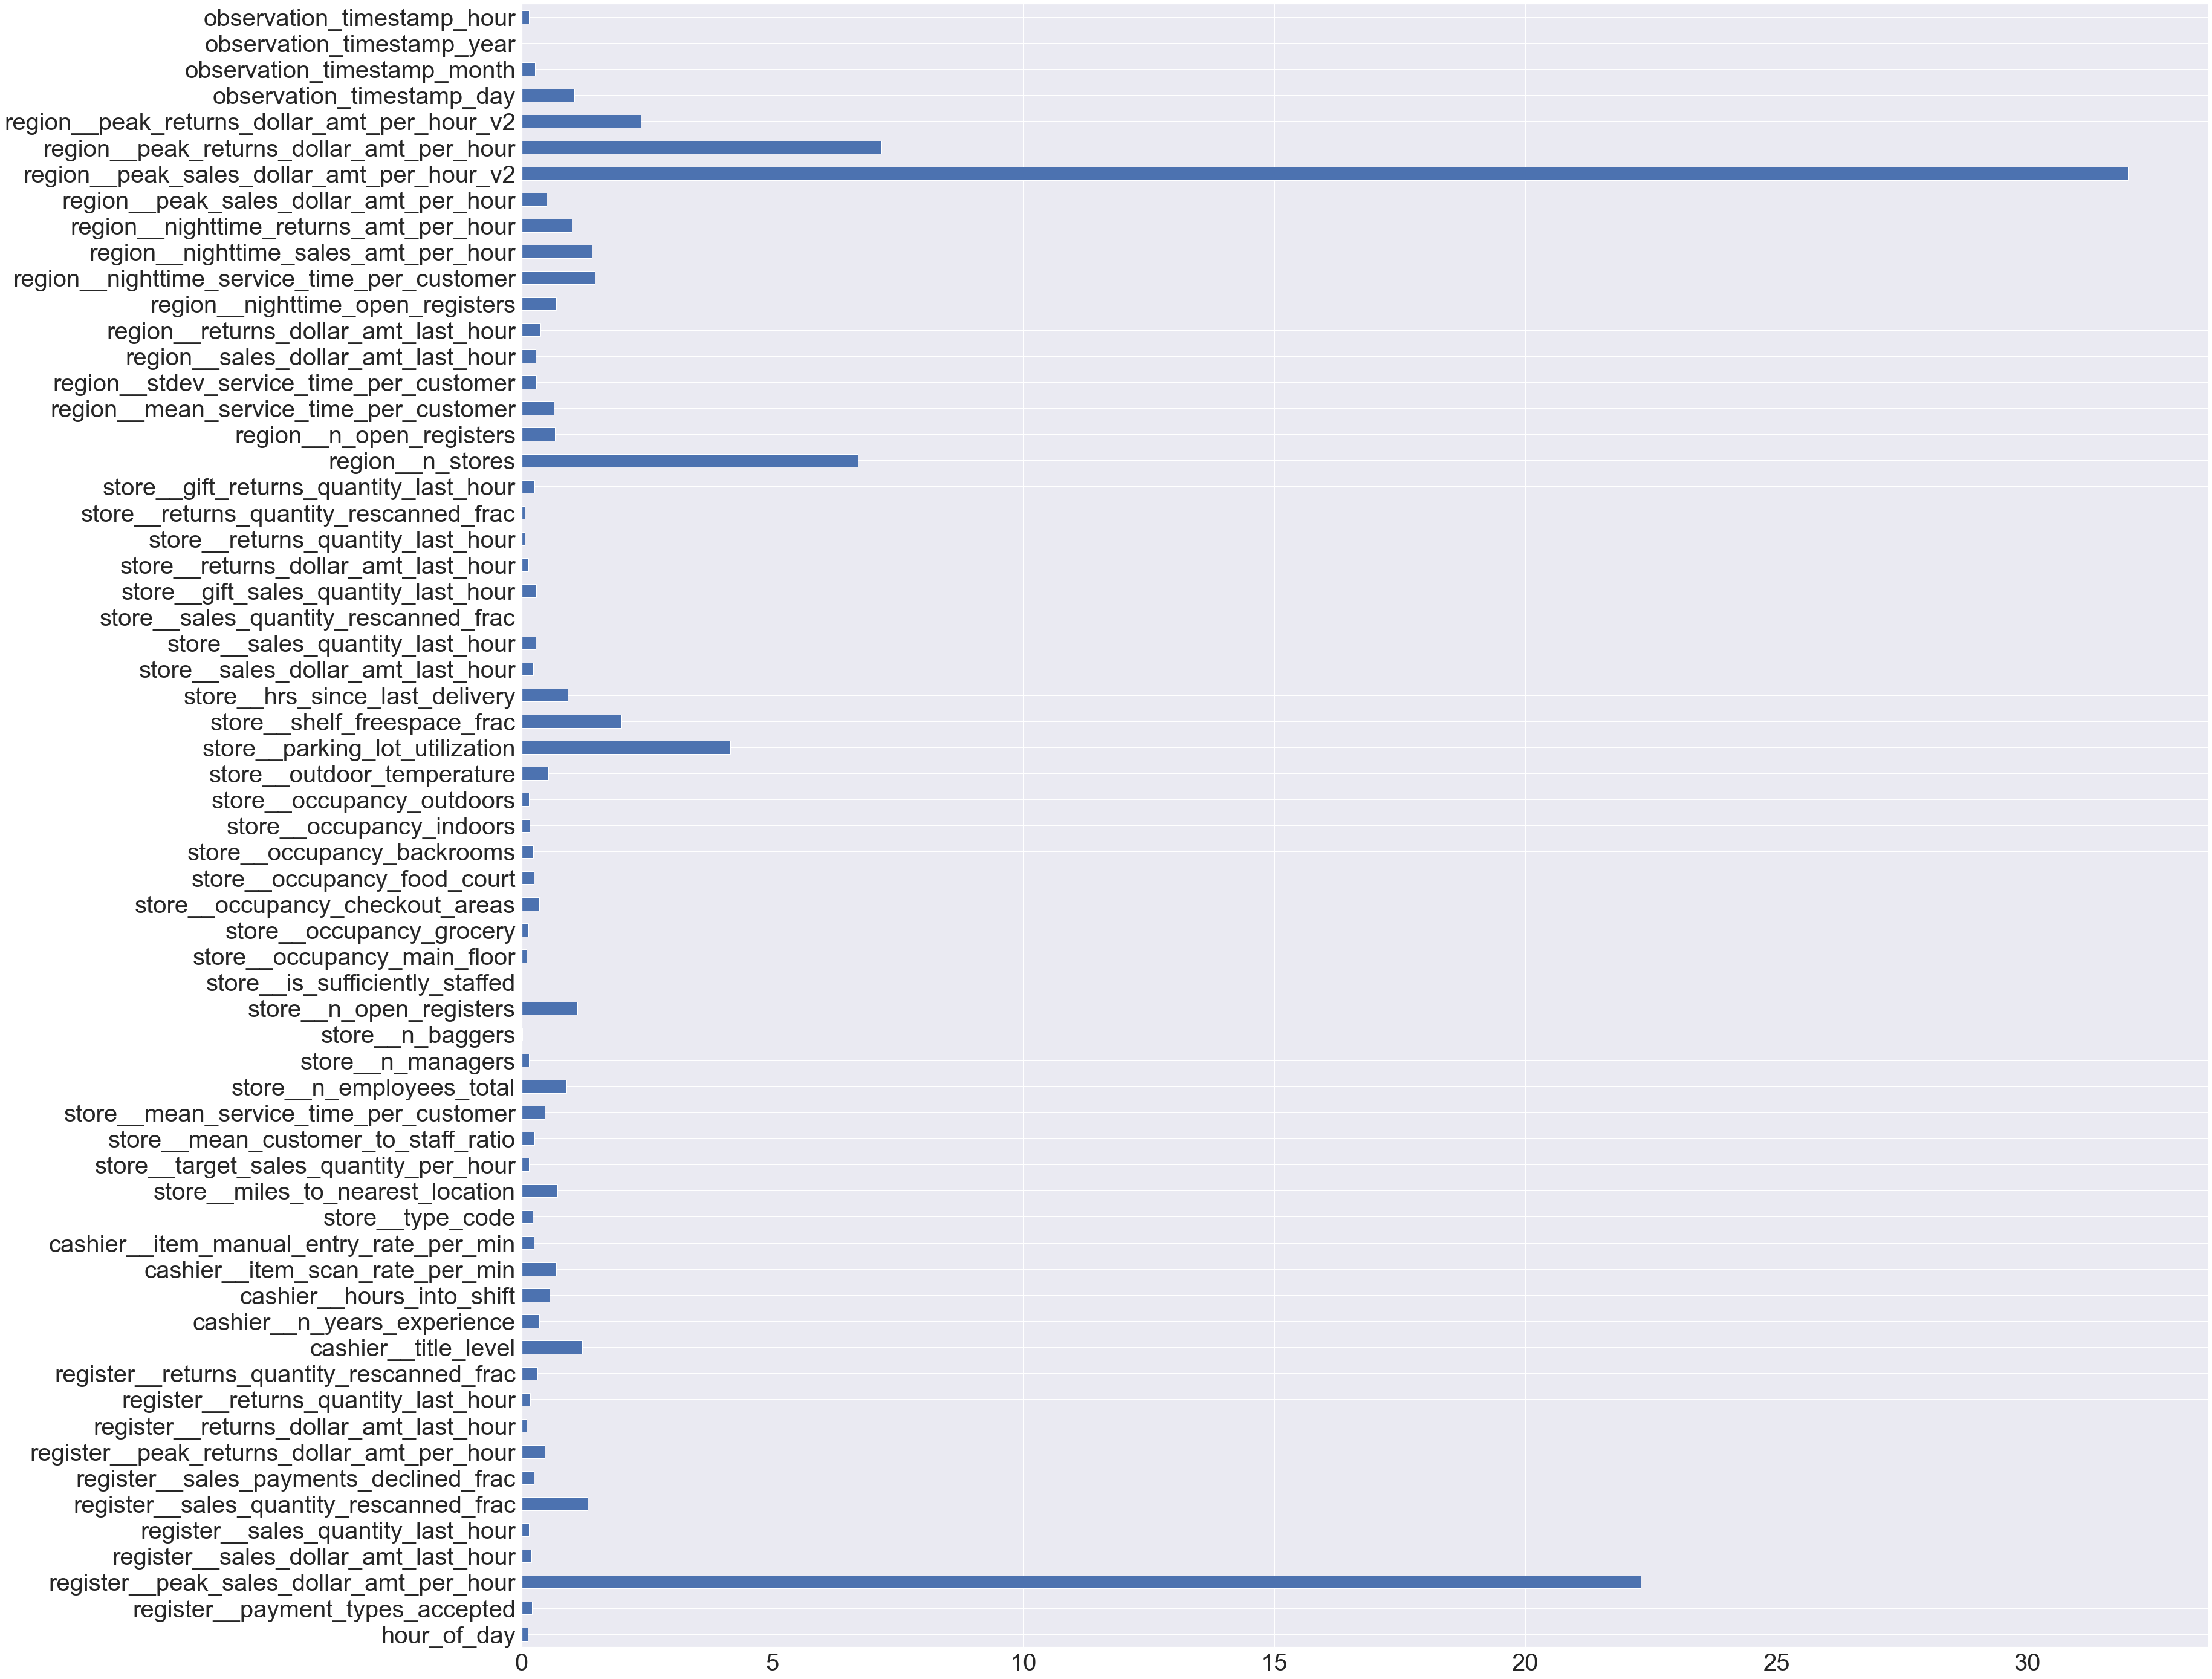

In [50]:
sns.set(rc={'figure.figsize':(50,50)})

pd.Series(catboost_model.feature_importances_, index= X_train.columns).plot(kind="barh", fontsize=40)

In [51]:
lightgbm_model.fit(X_train, y_train) 
y_pred = lightgbm_model.predict(X_test) 

In [52]:
print('MSE:', mse(y_test, y_pred))
print("RMSE:", np.sqrt(mse(y_test, y_pred)))
print('R2:', r2(y_test, y_pred))

MSE: 36212.47310307927
RMSE: 190.2957516684996
R2: 0.9463039612572636


<AxesSubplot:>

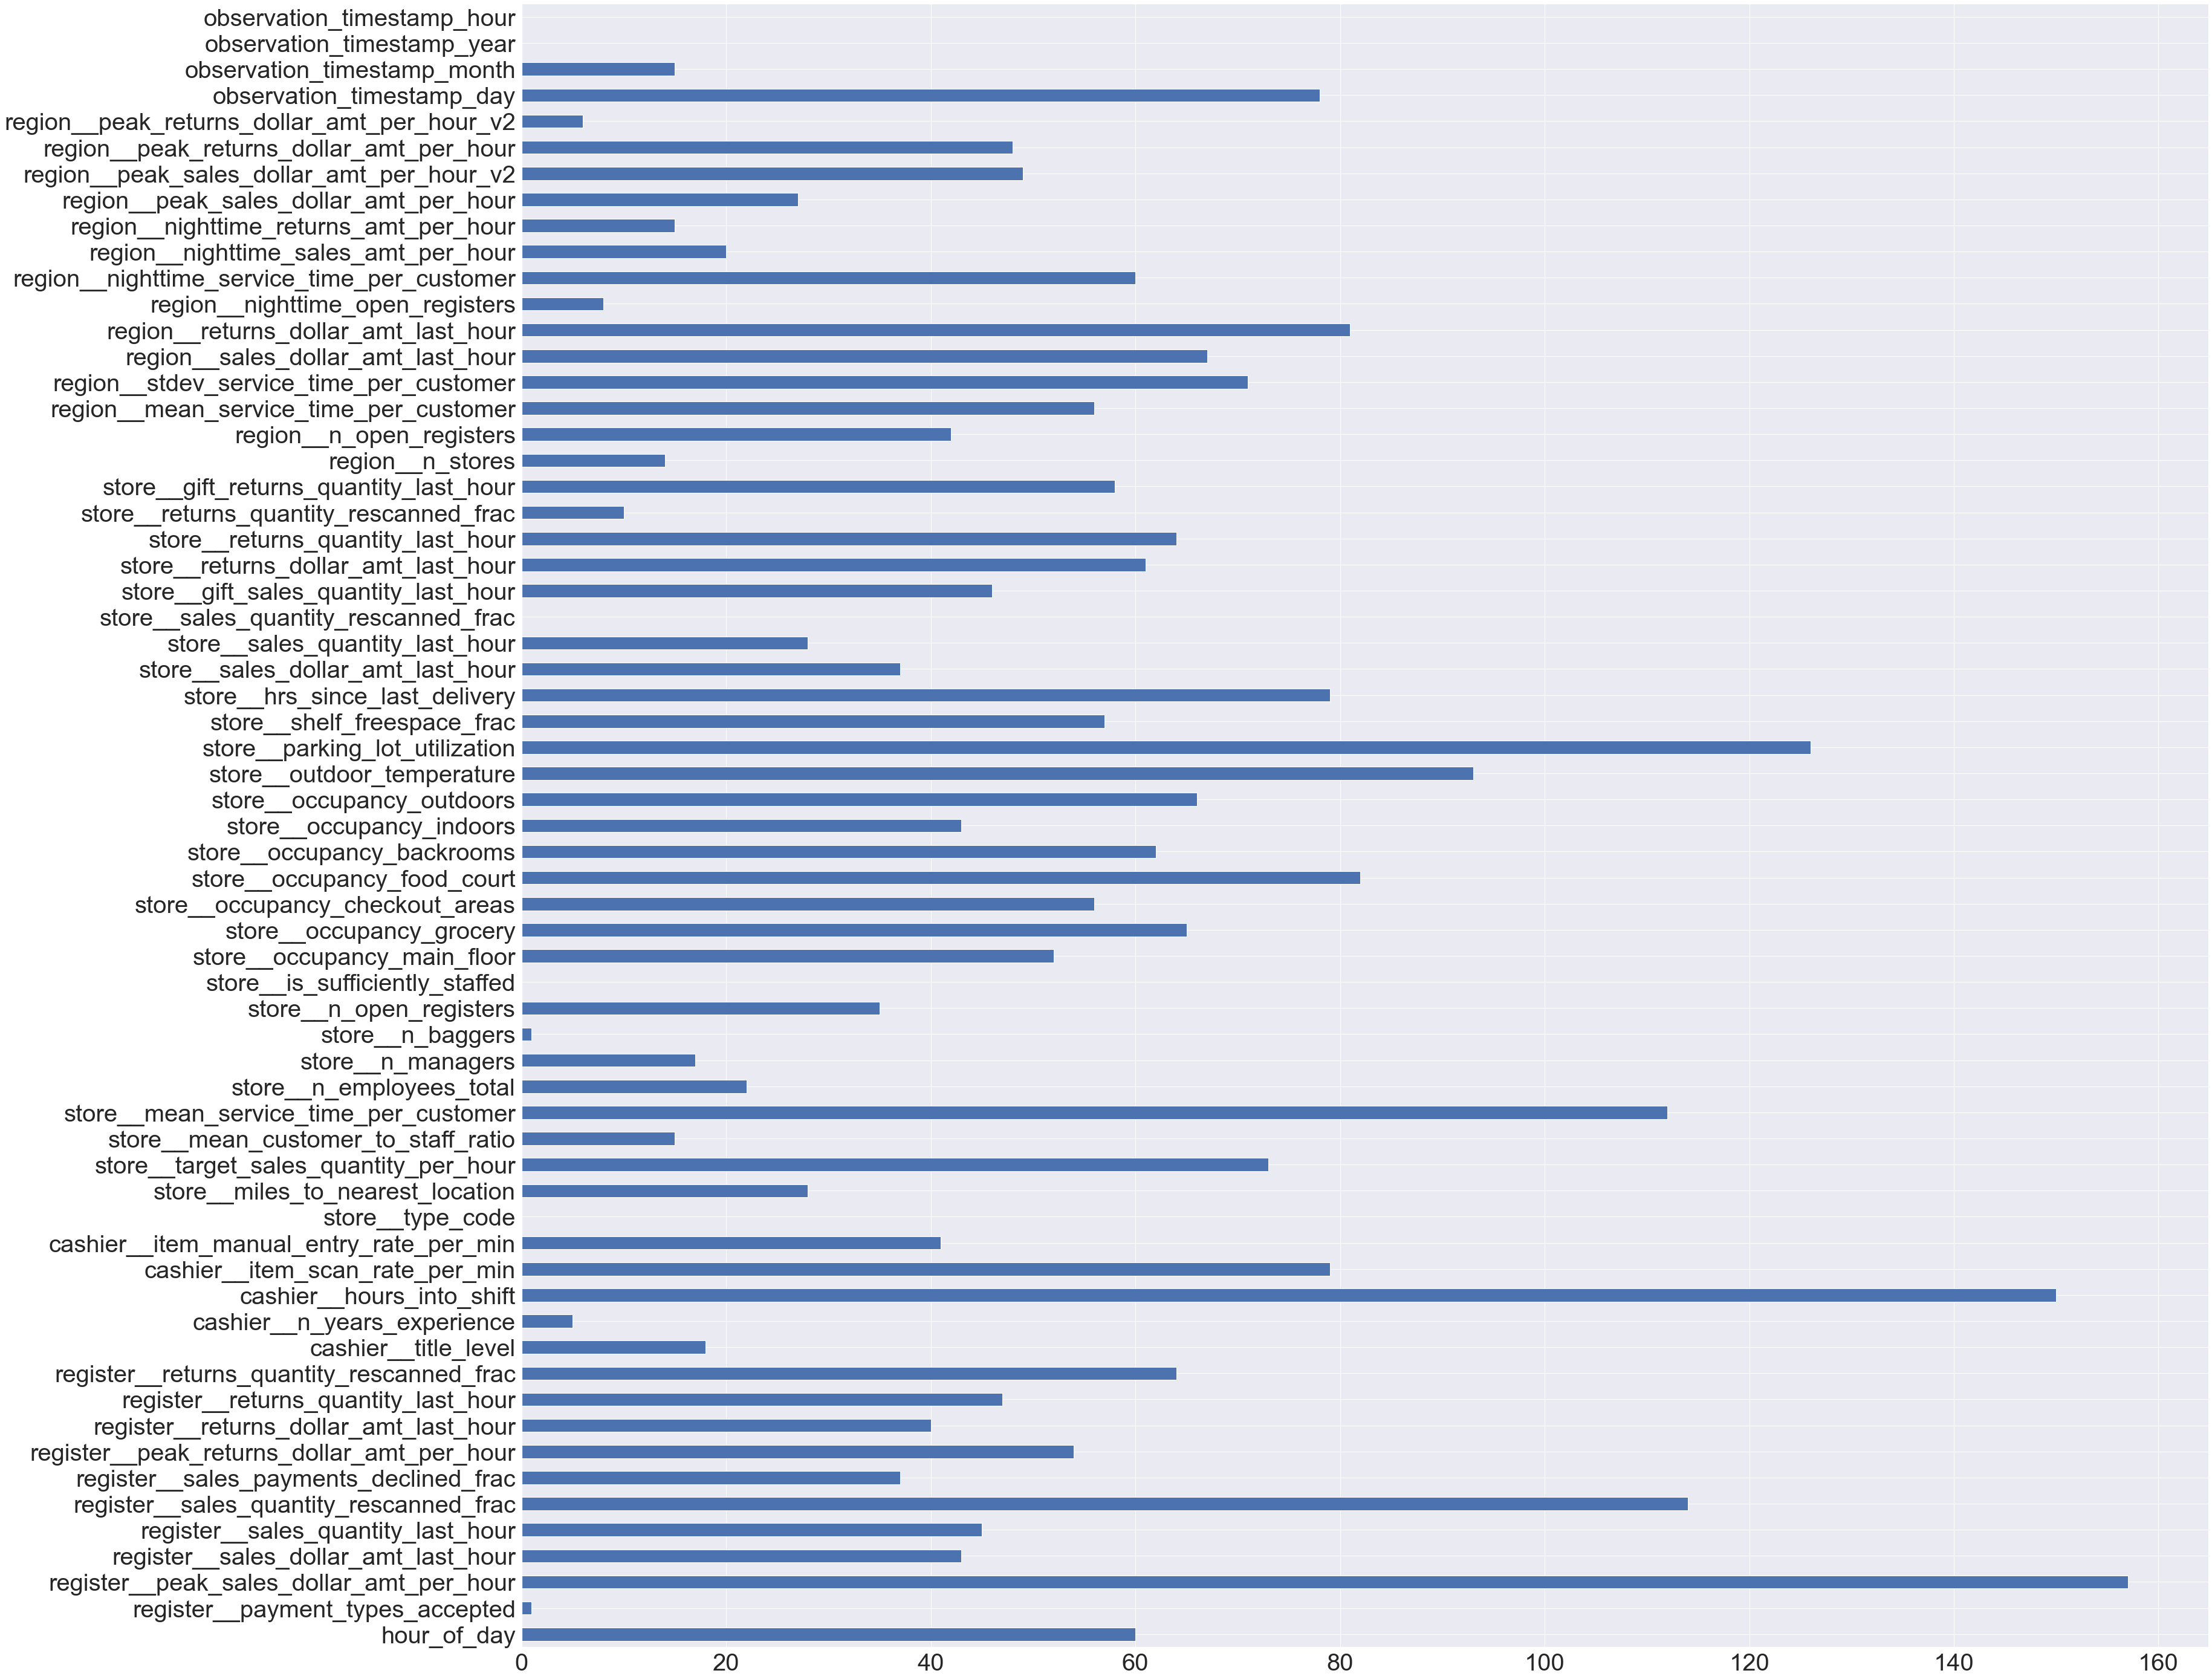

In [53]:
sns.set(rc={'figure.figsize':(50,50)})

pd.Series(lightgbm_model.feature_importances_, index= X_train.columns).plot(kind="barh", fontsize=40)

In [54]:
predictions = catboost_model.predict(test)
results_df = pd.DataFrame({'prediction':predictions})
results_df.to_csv('p2.csv',index=False)

In [55]:
train.columns

Index(['hour_of_day', 'register__sales_dollar_amt_this_hour',
       'register__payment_types_accepted',
       'register__peak_sales_dollar_amt_per_hour',
       'register__sales_dollar_amt_last_hour',
       'register__sales_quantity_last_hour',
       'register__sales_quantity_rescanned_frac',
       'register__sales_payments_declined_frac',
       'register__peak_returns_dollar_amt_per_hour',
       'register__returns_dollar_amt_last_hour',
       'register__returns_quantity_last_hour',
       'register__returns_quantity_rescanned_frac', 'cashier__title_level',
       'cashier__n_years_experience', 'cashier__hours_into_shift',
       'cashier__item_scan_rate_per_min',
       'cashier__item_manual_entry_rate_per_min', 'store__type_code',
       'store__miles_to_nearest_location',
       'store__target_sales_quantity_per_hour',
       'store__mean_customer_to_staff_ratio',
       'store__mean_service_time_per_customer', 'store__n_employees_total',
       'store__n_managers', 'store__

In [56]:
X = train.drop(['register__sales_dollar_amt_this_hour', 'register__payment_types_accepted', 'store__is_sufficiently_staffed', 
                'store__sales_quantity_rescanned_frac', 'observation_timestamp_hour', 'store__n_baggers', 
                'observation_timestamp_year', 'region__peak_returns_dollar_amt_per_hour_v2', 'store__type_code' ], axis=1)
y = train['register__sales_dollar_amt_this_hour']

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [58]:
# random forest regressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred = rf_reg.predict(X_test)

print('MSE', mse(y_test, y_pred))
print("RMSE:", np.sqrt(mse(y_test, y_pred)))
print('R2:', r2(y_test, y_pred))

MSE 35519.46551339084
RMSE: 188.4660858440872
R2: 0.9473315564253427


In [59]:
catboost_model.fit(X_train, y_train) 
y_pred = catboost_model.predict(X_test)

Learning rate set to 0.061371
0:	learn: 774.2934764	total: 18.5ms	remaining: 18.5s
1:	learn: 734.5660646	total: 25.8ms	remaining: 12.9s
2:	learn: 697.3005310	total: 32.5ms	remaining: 10.8s
3:	learn: 663.0448024	total: 39ms	remaining: 9.72s
4:	learn: 630.2704720	total: 46.4ms	remaining: 9.22s
5:	learn: 599.8539915	total: 103ms	remaining: 17.1s
6:	learn: 572.8381838	total: 158ms	remaining: 22.3s
7:	learn: 546.4598534	total: 230ms	remaining: 28.5s
8:	learn: 521.5977916	total: 298ms	remaining: 32.8s
9:	learn: 499.1168966	total: 354ms	remaining: 35s
10:	learn: 478.7574733	total: 419ms	remaining: 37.7s
11:	learn: 458.1676036	total: 494ms	remaining: 40.6s
12:	learn: 439.8034681	total: 564ms	remaining: 42.9s
13:	learn: 422.6686366	total: 626ms	remaining: 44.1s
14:	learn: 406.7171634	total: 695ms	remaining: 45.7s
15:	learn: 392.3158512	total: 768ms	remaining: 47.2s
16:	learn: 379.1485628	total: 832ms	remaining: 48.1s
17:	learn: 366.9254048	total: 897ms	remaining: 48.9s
18:	learn: 355.5702796	to

160:	learn: 179.6556039	total: 6.48s	remaining: 33.8s
161:	learn: 179.5399008	total: 6.51s	remaining: 33.7s
162:	learn: 179.1856557	total: 6.53s	remaining: 33.5s
163:	learn: 179.0651789	total: 6.55s	remaining: 33.4s
164:	learn: 179.0090166	total: 6.58s	remaining: 33.3s
165:	learn: 178.7056333	total: 6.6s	remaining: 33.2s
166:	learn: 178.5233555	total: 6.63s	remaining: 33.1s
167:	learn: 178.4049805	total: 6.66s	remaining: 33s
168:	learn: 178.2903960	total: 6.7s	remaining: 32.9s
169:	learn: 178.1134471	total: 6.78s	remaining: 33.1s
170:	learn: 177.9772840	total: 6.81s	remaining: 33s
171:	learn: 177.8197277	total: 6.83s	remaining: 32.9s
172:	learn: 177.7354643	total: 6.86s	remaining: 32.8s
173:	learn: 177.4727248	total: 6.89s	remaining: 32.7s
174:	learn: 177.4115388	total: 6.92s	remaining: 32.6s
175:	learn: 177.3198616	total: 6.95s	remaining: 32.5s
176:	learn: 177.1880058	total: 6.97s	remaining: 32.4s
177:	learn: 177.1451770	total: 6.99s	remaining: 32.3s
178:	learn: 177.0520267	total: 7.0

315:	learn: 160.2775853	total: 10.4s	remaining: 22.5s
316:	learn: 160.1216004	total: 10.4s	remaining: 22.5s
317:	learn: 160.0621369	total: 10.5s	remaining: 22.4s
318:	learn: 159.9549348	total: 10.5s	remaining: 22.4s
319:	learn: 159.7802299	total: 10.5s	remaining: 22.3s
320:	learn: 159.7539305	total: 10.5s	remaining: 22.2s
321:	learn: 159.5875688	total: 10.5s	remaining: 22.2s
322:	learn: 159.4916724	total: 10.6s	remaining: 22.1s
323:	learn: 159.4161492	total: 10.6s	remaining: 22.1s
324:	learn: 159.3768546	total: 10.6s	remaining: 22s
325:	learn: 159.3305969	total: 10.6s	remaining: 22s
326:	learn: 159.1870468	total: 10.6s	remaining: 21.9s
327:	learn: 159.0554457	total: 10.7s	remaining: 21.9s
328:	learn: 158.9280981	total: 10.7s	remaining: 21.8s
329:	learn: 158.8264090	total: 10.7s	remaining: 21.8s
330:	learn: 158.7337980	total: 10.7s	remaining: 21.7s
331:	learn: 158.6338680	total: 10.8s	remaining: 21.7s
332:	learn: 158.5596942	total: 10.8s	remaining: 21.6s
333:	learn: 158.4867998	total: 1

471:	learn: 146.5264278	total: 13.8s	remaining: 15.4s
472:	learn: 146.4746193	total: 13.8s	remaining: 15.4s
473:	learn: 146.4260705	total: 13.8s	remaining: 15.3s
474:	learn: 146.3506355	total: 13.8s	remaining: 15.3s
475:	learn: 146.2492137	total: 13.9s	remaining: 15.3s
476:	learn: 146.1433993	total: 13.9s	remaining: 15.2s
477:	learn: 146.0749067	total: 13.9s	remaining: 15.2s
478:	learn: 146.0350907	total: 13.9s	remaining: 15.1s
479:	learn: 145.9569041	total: 13.9s	remaining: 15.1s
480:	learn: 145.8875898	total: 13.9s	remaining: 15.1s
481:	learn: 145.7987927	total: 14s	remaining: 15s
482:	learn: 145.6860068	total: 14s	remaining: 15s
483:	learn: 145.6352383	total: 14s	remaining: 14.9s
484:	learn: 145.5723510	total: 14s	remaining: 14.9s
485:	learn: 145.5056740	total: 14s	remaining: 14.8s
486:	learn: 145.4203153	total: 14.1s	remaining: 14.8s
487:	learn: 145.3723426	total: 14.1s	remaining: 14.8s
488:	learn: 145.3232890	total: 14.1s	remaining: 14.7s
489:	learn: 145.2955331	total: 14.1s	remai

628:	learn: 136.0823457	total: 16.6s	remaining: 9.79s
629:	learn: 136.0416511	total: 16.6s	remaining: 9.76s
630:	learn: 135.9353784	total: 16.6s	remaining: 9.73s
631:	learn: 135.8632929	total: 16.6s	remaining: 9.7s
632:	learn: 135.7975438	total: 16.7s	remaining: 9.66s
633:	learn: 135.7505604	total: 16.7s	remaining: 9.63s
634:	learn: 135.6562676	total: 16.7s	remaining: 9.6s
635:	learn: 135.5859068	total: 16.7s	remaining: 9.57s
636:	learn: 135.5101006	total: 16.7s	remaining: 9.54s
637:	learn: 135.4971730	total: 16.7s	remaining: 9.5s
638:	learn: 135.4383063	total: 16.8s	remaining: 9.47s
639:	learn: 135.3828391	total: 16.8s	remaining: 9.44s
640:	learn: 135.3062548	total: 16.8s	remaining: 9.41s
641:	learn: 135.2387957	total: 16.8s	remaining: 9.38s
642:	learn: 135.1493227	total: 16.8s	remaining: 9.35s
643:	learn: 135.1482633	total: 16.9s	remaining: 9.31s
644:	learn: 135.0782227	total: 16.9s	remaining: 9.28s
645:	learn: 135.0333947	total: 16.9s	remaining: 9.25s
646:	learn: 134.9668924	total: 

789:	learn: 126.9740106	total: 19.2s	remaining: 5.09s
790:	learn: 126.9316163	total: 19.2s	remaining: 5.07s
791:	learn: 126.8932405	total: 19.2s	remaining: 5.04s
792:	learn: 126.8498460	total: 19.2s	remaining: 5.01s
793:	learn: 126.8035500	total: 19.2s	remaining: 4.99s
794:	learn: 126.7464205	total: 19.2s	remaining: 4.96s
795:	learn: 126.7089951	total: 19.3s	remaining: 4.93s
796:	learn: 126.6367839	total: 19.3s	remaining: 4.91s
797:	learn: 126.5870247	total: 19.3s	remaining: 4.88s
798:	learn: 126.5559975	total: 19.3s	remaining: 4.85s
799:	learn: 126.5054304	total: 19.3s	remaining: 4.83s
800:	learn: 126.4503938	total: 19.3s	remaining: 4.8s
801:	learn: 126.3953342	total: 19.3s	remaining: 4.78s
802:	learn: 126.3556647	total: 19.4s	remaining: 4.75s
803:	learn: 126.3032932	total: 19.4s	remaining: 4.72s
804:	learn: 126.2669843	total: 19.4s	remaining: 4.7s
805:	learn: 126.2227069	total: 19.4s	remaining: 4.67s
806:	learn: 126.1824798	total: 19.4s	remaining: 4.64s
807:	learn: 126.1537126	total:

946:	learn: 119.5769522	total: 21.5s	remaining: 1.2s
947:	learn: 119.5176782	total: 21.5s	remaining: 1.18s
948:	learn: 119.4841549	total: 21.5s	remaining: 1.16s
949:	learn: 119.4448728	total: 21.5s	remaining: 1.13s
950:	learn: 119.4018761	total: 21.6s	remaining: 1.11s
951:	learn: 119.3529919	total: 21.6s	remaining: 1.09s
952:	learn: 119.3100376	total: 21.6s	remaining: 1.06s
953:	learn: 119.2572755	total: 21.6s	remaining: 1.04s
954:	learn: 119.2093744	total: 21.6s	remaining: 1.02s
955:	learn: 119.1489047	total: 21.6s	remaining: 995ms
956:	learn: 119.1035230	total: 21.6s	remaining: 972ms
957:	learn: 119.0636755	total: 21.6s	remaining: 949ms
958:	learn: 119.0156880	total: 21.7s	remaining: 926ms
959:	learn: 119.0019400	total: 21.7s	remaining: 903ms
960:	learn: 118.9710411	total: 21.7s	remaining: 880ms
961:	learn: 118.9370529	total: 21.7s	remaining: 857ms
962:	learn: 118.8721317	total: 21.7s	remaining: 834ms
963:	learn: 118.8422851	total: 21.7s	remaining: 811ms
964:	learn: 118.8015311	total

In [60]:
print('MSE', mse(y_test, y_pred))
print("RMSE:", np.sqrt(mse(y_test, y_pred)))
print('R2:', r2(y_test, y_pred))

MSE 33694.511928662236
RMSE: 183.5606491834844
R2: 0.9500376068547167


In [61]:
lightgbm_model.fit(X_train, y_train) 
y_pred = lightgbm_model.predict(X_test) 

print('MSE', mse(y_test, y_pred))
print("RMSE:", np.sqrt(mse(y_test, y_pred)))
print('R2:', r2(y_test, y_pred))

MSE 35712.58714510467
RMSE: 188.97774245954116
R2: 0.9470451946905601


<AxesSubplot:>

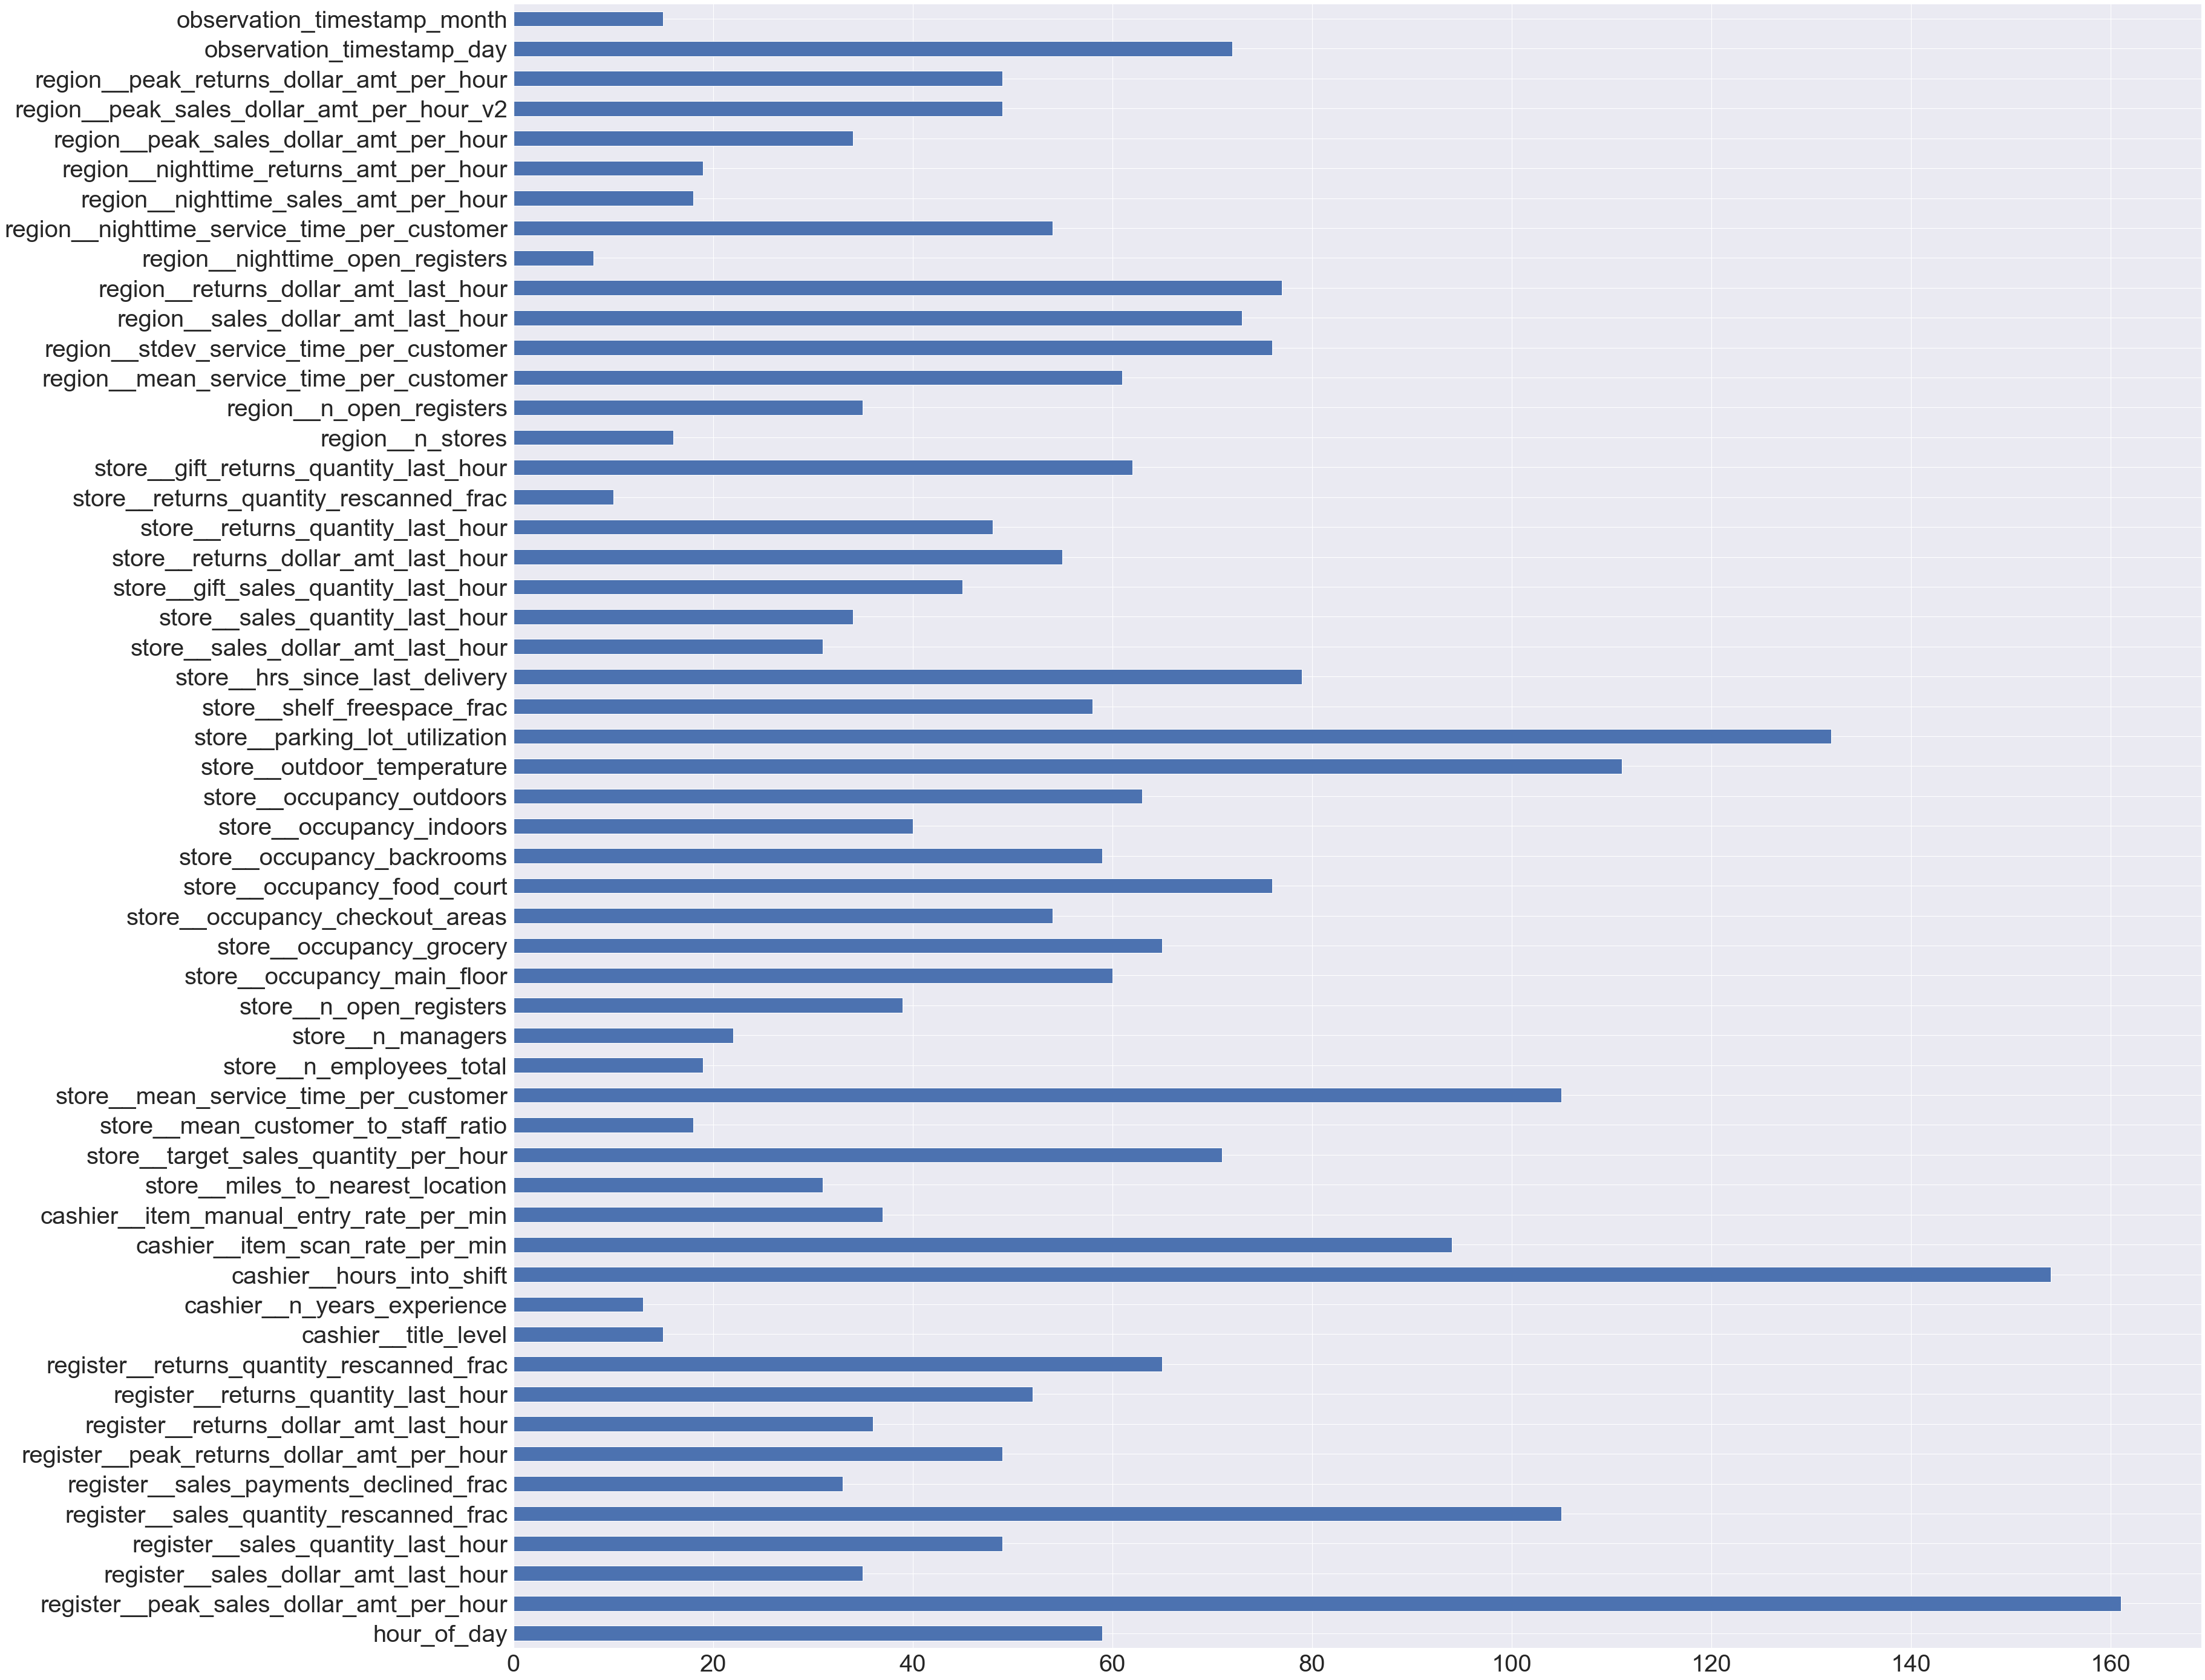

In [62]:
sns.set(rc={'figure.figsize':(50,50)})

pd.Series(lightgbm_model.feature_importances_, index= X_train.columns).plot(kind="barh", fontsize=40)

# Make prediction and export the file to csv

In [66]:
predictions = catboost_model.predict(test)
results_df = pd.DataFrame({'prediction':predictions})
results_df.to_csv('p6.csv',index=False)